# Cognitive, Behavioral & Social Data Project

## Features stability across several Psychological Tests Datasets

### Giangiacomi Angelica (2055739) - Palmieri Anthony (2038503)
#### Academic year: 2022/2023
_____________________

## Introduction

Nowadays, Machine and Deep Learning are more and more used in different fields of study, including Cognitive Neuroscience, in which one of the most important applications regards the analysis of Psychological Tests.

A Psychological Test is an objective and standardized measure of an individual's mental and/or behavioral characteristics, supported by numerical scales or category systems.

In particular, in this project we studied some tests related to malingering attitudes, in order to tell apart honest from dishonest behaviors.
To accomplish this, we used some Machine Learning techniques, including both Unsupervised and Supervised algorithms.
The aim was to differentiate the various predictors, identifying for each of the given datasets the most relevant ones.
Specifically, the algorithms we implemented are the following:

    1. Unsupervised algorithms:
        - PCA
        - Sparse PCA
        - Variance Threshold Feature Selection
        
    2. Supervised algorithms:
        - Logistic Regression
        - Support Vector Machines (SVM)
        - Decision Tree
        - Random Forest
        - XGBoost

In addition, upon the set of features determined by the previous models we also implemented some Greedy Features Selection strategies, in an attempt to further reduce the number of relevant predictors.

All the above mentioned algorithms are tested on all the given datasets, datasets sharing more or less the same structure although with different features. In particular, each predictor is related to a specific psychological trait, quantified with an integer number within a proper range.

In [ ]:
# import libraries 

# Essentials
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import linalg as la
from pandas.api.types import is_numeric_dtype
from collections import Counter 

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib_venn import venn3

!pip install venn         # comment this if venn library already installed
# Plot Venn Diagram
from venn import venn

# Feature selection
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.feature_selection import VarianceThreshold
 
# Supervised Learning
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier

Defaulting to user installation because normal site-packages is not writeable


The next cell is needed in case you want to connect Colab to your Google Drive and load the data directly from there.

In [ ]:
# if you don't want to connect to your Drive just set drive_path='' and delete the rest of the cell
# drive_path = ''

# if you want to connect to your drive instead run the following, changing the path properly
from google.colab import drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/CBSD_project/'

Since the csv files for the folder 10.\_R\_NEO\_PI are divided into Honest.csv and Faked.csv, we first need to merge them together into one single dataset. If you have already done this, then just skip the next cell of code.

In [ ]:
# since the csv files for the folder 10._R_NEO_PI are divided into Honest.csv and Faked.csv, 
# we first need to merge them together into one single dataset.

honest = pd.read_csv(drive_path+'Datasets/10._R_NEO_PI/Honest.csv', sep=';', skiprows=[0])
honest['CONDITION'] = list('H'*honest.shape[0])

dishonest = pd.read_csv(drive_path+'Datasets/10._R_NEO_PI/Faked.csv', sep=';', skiprows=[0])
dishonest['CONDITION'] = list('D'*dishonest.shape[0])

# concatenate Honest.csv and Faked.csv into a single csv file
dataset = pd.concat([honest, dishonest])

# save resulting file to the given path as 10._R_NEO_PI.csv
dataset.to_csv(path_or_buf=drive_path+'Datasets/10._R_NEO_PI/10._R_NEO_PI.csv', index=False)

In the next cell we define a dictionary containing for each dataset:

    - a txt file where we will save all main results;
    - the path to the dataset;
    - the separator for the csv file.

The path and the separator are needed to load the dataset and start working on it.

In [ ]:
# define the dictionary we'll use to access the datasets and start working on them
files = {
    1: ['DT_df_CC.txt', drive_path+'Datasets/1._shortDT_(2)/DT_df_CC.csv', ','],
    2: ['DT_df_JI.txt', drive_path+'Datasets/1._shortDT_(2)/DT_df_JI.csv', ','],
    3: ['PRMQ_df.txt', drive_path+'Datasets/2._PRMQ/PRMQ_df.csv', ','],
    4: ['PCL5_df.txt', drive_path+'Datasets/3._PCL/PCL5_df.csv', ';'],
    5: ['NAQ_R_df(1).txt', drive_path+'Datasets/4._NAQ_R/NAQ_R_df(1).csv', ';'],
    6: ['NAQ_R_df(2).txt', drive_path+'Datasets/4._NAQ_R/NAQ_R_df(2).csv', ';'],
    7: ['PHQ9_GAD7_df.txt', drive_path+'Datasets/5._PHQ9_GAD7/PHQ9_GAD7_df.csv', ';'],
    8: ['PID5_df.txt', drive_path+'Datasets/6._PID5/PID5_df.csv', ';'],
    9: ['PID5_df(1).txt', drive_path+'Datasets/6._PID5/PID5_df(1).csv', ';'],
    10: ['PID5_df(2).txt', drive_path+'Datasets/6._PID5/PID5_df(2).csv', ';'],
    11: ['sPID-5_df.txt', drive_path+'Datasets/7._shortPID5/sPID-5_df.csv', ','],
    12: ['PRFQ_df.txt', drive_path+'Datasets/8._PRFQ/PRFQ_df.csv', ','],
    13: ['IESR_df.txt', drive_path+'Datasets/9._IESR/IESR_df.csv', ','],
    14: ['10._R_NEO_PI.txt', drive_path+'Datasets/10._R_NEO_PI/10._R_NEO_PI.csv', ','],
    15: ['RAW_DDDT.txt', drive_path+'Datasets/11._DDDT/RAW_DDDT.csv', ','],
    16: ['IADQ_df.txt', drive_path+'Datasets/12._IADQ/IADQ_df.csv', ','],
    17: ['BF_df_CTU.txt', drive_path+'Datasets/13._BF_(3)/BF_df_CTU.csv', ','],
    18: ['BF_df_OU.txt', drive_path+'Datasets/13._BF_(3)/BF_df_OU.csv', ','],
    19: ['BF_df_V.txt', drive_path+'Datasets/13._BF_(3)/BF_df_V.csv', ','] 
}

## 1. Preprocessing and Data Cleaning

In this section we focus on the Preprocessing phase.


Considering we have many datasets, for computational reasons, we decided to avoid cyclying over all the datasets with a for-loop and, instead, we preferred working with one dataset at the time.
This is the reason why, in the cell above, we put all of them in a dictionary.
To use the dataset you want to work with, just change the $num\_dataset$ variable according to the keys of the dictionary above.

In [ ]:
# choose the file by changing the num_dataset variable
num_dataset = 1

# upload the dataset you want to study
data = pd.read_csv(files[num_dataset][1], sep=files[num_dataset][2])

# in txt_path specify the path you want the txt files to be saved to
txt_path = drive_path
# open the connection to the file we'll write the main results onto
file = open(txt_path+files[num_dataset][0], 'w')

data.head()

,Mach1,Mach2,Mach3,Mach4,Mach5,Mach6,Mach7,Mach8,Mach9,Psycho1,...,Narc1,Narc2,Narc3,Narc4,Narc5,Narc6,Narc7,Narc8,Narc9,CONDITION
0,3,3,2,4,4,3,3,3,4,2,...,3,3,3,3,3,4,3,4,2,H
1,4,2,1,3,4,4,4,2,2,3,...,4,1,3,3,2,2,3,4,5,H
2,4,1,3,3,3,1,4,1,5,1,...,3,2,3,3,2,1,2,3,3,H
3,4,3,1,3,3,4,2,3,4,2,...,4,4,1,2,4,2,2,3,4,H
4,3,2,1,2,2,3,3,2,3,2,...,2,2,2,2,3,1,1,3,4,H


Now we check for Na or NaN values:

In [ ]:
# check dataset dimensions
print('Number of rows, columns: ',data.shape,'\n')

# check for NA, nan values on each columns
print('number of NA/nan values per columns:\n', np.sum(data.isna()),'\n')

# dataset is clean
print('number of NA/nan values over all dataset: ', np.sum(np.sum(data.isna())))

Number of rows, columns:  (482, 28) 

number of NA/nan values per columns:
 Mach1        0
Mach2        0
Mach3        0
Mach4        0
Mach5        0
Mach6        0
Mach7        0
Mach8        0
Mach9        0
Psycho1      0
Psycho2      0
Psycho3      0
Psycho4      0
Psycho5 H    0
Psycho6      0
Psycho7      0
Psycho8      0
Psycho9      0
Narc1        0
Narc2        0
Narc3        0
Narc4        0
Narc5        0
Narc6        0
Narc7        0
Narc8        0
Narc9        0
CONDITION    0
dtype: int64 

number of NA/nan values over all dataset:  0


Since in the dataset some variables may not be numerical, we implement the one-hot-encoding technique to convert the categorical features to numerical ones:

In [ ]:
# let's initialize the numpy objects we'll use to train our models

# target labels vector
y = np.array(data.iloc[:, data.shape[1]-1])

# design matrix
data = data.iloc[:, :data.shape[1]-1]

# for safety reasons, we'll work on a copy of the dataset
data_encoded = data.copy()

# get categorical features. These are the features we want to one-hot encode
cat_cols = [col for col in data.columns if is_numeric_dtype(data.loc[:, col])==False]

# move categorical variables to the end of the dataframe
for col in cat_cols:
    categorical = data_encoded.loc[:, col]
    data_encoded.drop(col, axis=1, inplace=True)
    data_encoded = pd.concat([data_encoded, categorical], axis=1)

# get numerical features indexes. We need these indexes for a feature-correlation analysis
num_cols = [i for i in range(data_encoded.shape[1]) if is_numeric_dtype(data_encoded.iloc[:, i])==True]

# one-hot encode the categorical features
if cat_cols != []:
    data_encoded = pd.get_dummies(data_encoded, columns=cat_cols, drop_first=False)

# take the indexes of categorical features after expanding via one-hot encoding
cat_cols = np.arange(np.max(num_cols)+1, data_encoded.shape[1])

# finally get the design matrix
X = np.array(data_encoded)

print(X.shape)
print(y.shape)

(482, 27)
(482,)


Finally, in order to implement model selection and evaluation strategies we randomly
divide the original dataset into two disjoint subsets:

    • a Training set which we will use to train the parameters of our models (80% of original size);
    • a Test set which we will use to test the various algorithms (20% of original size).
    
Eventually, on the Training set we will implement a cross validation approach to determine the optimal values
of the hyperparameters (like regularization hyperparameters, for instance):

In [ ]:
# split dataset into train-validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print('Original dataset shape: ',X.shape)
print('Train_Val set shape: ',X_train_val.shape)
print('Test set shape: ',X_test.shape)

Original dataset shape:  (482, 27)
Train_Val set shape:  (385, 27)
Test set shape:  (97, 27)


## 2. Exploratory Data Analysis

In this section we analyze general properties of the dataset with a preliminar Exploratory Data Analysis.
In particular, we start by standardizing the data using the StandardScaler:

In [ ]:
# let's standardize the data via a standard scaler

scaler = StandardScaler()
scaler.fit(X_train_val)
X_train_val_scaled = scaler.transform(X_train_val)
X_test_scaled = scaler.transform(X_test)

Then we look at both the Correlation Matrix of the data and Variance Inflation Factors in order to spot a priori possible correlations and/or multicollinearity among the predictors.

First, we plot the Correlations Ellipses:

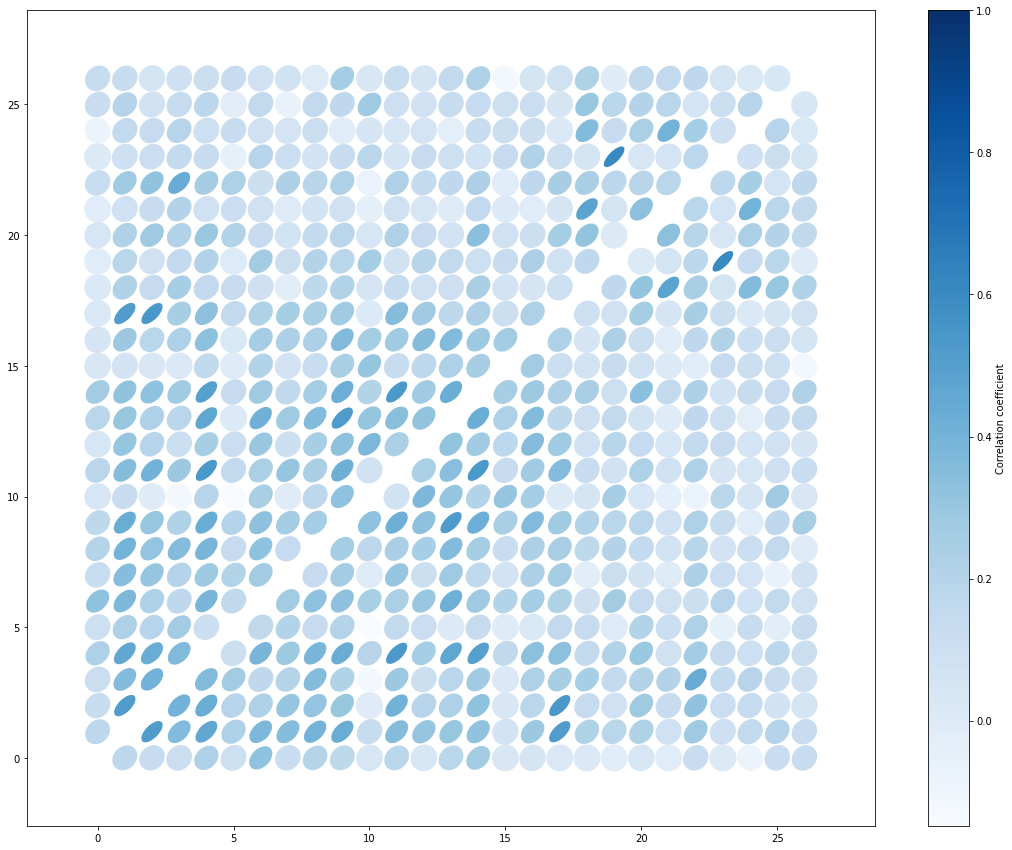

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.collections import EllipseCollection

# custom function to plot correlation-ellipses

def plot_corr_ellipses(data, ax=None, **kwargs):

    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    if ax is None:
        fig, ax = plt.subplots(1, 1, subplot_kw={'aspect':'equal'})
        ax.set_xlim(-0.5, M.shape[1] - 0.5)
        ax.set_ylim(-0.5, M.shape[0] - 0.5)

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel()
    h = 1 - np.abs(M).ravel()
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec


# plot the Correlations Ellipses
cor = np.corrcoef(X_train_val_scaled[:, num_cols].T)
fig, ax = plt.subplots(1, 1, figsize=(19, 15))
m = plot_corr_ellipses(cor, ax=ax, cmap='Blues')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')
ax.margins(0.1)
plt.show()

We would like to clarify that the function we used above it is not written by us, but it is taken from Stackoverflow, specifically at the link: 

https://stackoverflow.com/questions/34556180/how-can-i-plot-a-correlation-matrix-as-a-set-of-ellipses-similar-to-the-r-open

In the next cell we implement a first simple feature selection strategy by removing highly correlated predictors; in particular if two features (i.e. two columns) $X_i$ and $X_j$ share a correlation value over a fixed threshold, then we drop the one with the highest average correlation, w.r.t. all the other variables:

In [ ]:
# check for correlation between numerical features

# compute correlation matrix
cor = np.corrcoef(X_train_val_scaled[:, num_cols].T)

# if |cor(Xi, Xj)|>=0.8 remove one from {Xi, Xj}

print('Original set of numerical features:\n',num_cols)

# save numerical columns to drop
to_drop = []

for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[1]):
        if np.abs(cor[i,j])>=0.8:
            # drop the variable with highest average correlation in absolute value
            if np.sum(np.abs(cor[i,:])) <= np.sum(np.abs(cor[j,:])):
                to_drop.append(j)
            else:
                to_drop.append(i)

# redefine num_cols by dropping correlated variables
num_cols = list(set(num_cols)-set(to_drop))

print('\nSet of numerical features after de-correlation:\n',num_cols)

Original set of numerical features:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

Set of numerical features after de-correlation:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


We also check for multicollinearity computing the Variance Inflation Factors (VIFs) for the numerical features:

In [ ]:
# compute VIFs for numerical features

# function to compute VIFs values
def compute_vifs(M):
  vifs = np.zeros(M.shape[1])
  for i in range(M.shape[1]):
    target = M[:, i]
    features = M[:, [j for j in range(M.shape[1]) if j!=i]]
    reg = LinearRegression().fit(features, target)
    TSS = np.dot(target-np.mean(target),target-np.mean(target))
    target_pred = reg.predict(features)
    RSS = np.dot(target-target_pred,target-target_pred)
    r2 = 1 - RSS/TSS
    vifs[i] = 1/(1-r2)
  return vifs


X_vifs = X_train_val_scaled[:, num_cols]
vifs = compute_vifs(X_vifs)

# keep dropping numerical features whose VIF values exceeds 4
while np.sum(vifs>=4)>=1:
  for i in range(len(vifs)):
    if vifs[i]>=4:
      to_drop = i
  del num_cols[to_drop]
  X_vifs = X_train_val_scaled[:, num_cols]
  vifs = compute_vifs(X_vifs)

print('\nSet of numerical features after fixing multicollinearity:\n',num_cols)

print('\nvifs: ', vifs)


Set of numerical features after fixing multicollinearity:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

vifs:  [1.30148945 2.09530235 1.88677863 1.67996233 2.05975084 1.29260171
 1.62269251 1.386383   1.49761245 2.00190181 1.68187057 1.83292461
 1.46352962 1.92491237 1.96330798 1.30088282 1.44737614 1.77965723
 1.63115018 1.8499326  1.43994127 1.52008474 1.46716987 1.70441572
 1.46610313 1.30479949 1.23608816]


Before moving on, we redefine Training and Test sets, after dropping correlated and multicollinear features:

In [ ]:
# redefine X_train_val and X_test after dropping correlated and multicollinear features
X_train_val = X_train_val[:, np.append(num_cols, cat_cols)]
X_test = X_test[:, np.append(num_cols, cat_cols)]
print(X_train_val.shape, X_test.shape)

# redefine X_train_val_scaled and X_test_scaled after dropping correlated and multicollinear features
X_train_val_scaled = X_train_val_scaled[:, np.append(num_cols, cat_cols)]
X_test_scaled = X_test_scaled[:, np.append(num_cols, cat_cols)]
print(X_train_val_scaled.shape, X_test_scaled.shape)

(385, 27) (97, 27)
(385, 27) (97, 27)


In [ ]:
# save current predictors to get back original set of features after feature selection
predictors = list(np.append(num_cols, cat_cols))
predictors = data.columns[predictors]

In [ ]:
predictors

Index(['Mach1 ', 'Mach2 ', 'Mach3 ', 'Mach4 ', 'Mach5 ', 'Mach6 ', 'Mach7 ',
       'Mach8 ', 'Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho3 ', 'Psycho4 ',
       'Psycho5 H', 'Psycho6', 'Psycho7 ', 'Psycho8 ', 'Psycho9 ', 'Narc1',
       'Narc2 ', 'Narc3 ', 'Narc4 ', 'Narc5 ', 'Narc6', 'Narc7 ', 'Narc8 ',
       'Narc9 '],
      dtype='object')

We finally take a look at the balancement of examples within the two classes, eventually applying an undersampling technique.

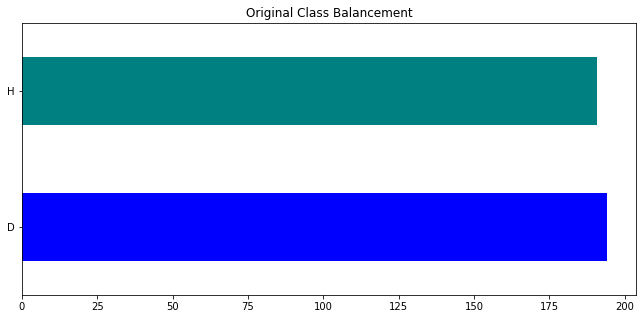

In [ ]:
# plot the histogram of the number of examples within each class
y_tv_df = pd.DataFrame(y_train_val, columns=['Type'])
plt.figure(figsize=(11,5))
y_tv_df['Type'].value_counts().plot(kind='barh', color=['blue', 'teal'], rot=0)
plt.title('Original Class Balancement')
plt.show()

In [ ]:
# check class balance

n_H = np.sum(y_train_val=='H')
n_D = np.sum(y_train_val=='D')
print('Honest class: ', n_H)
print('Dishonest class: ', n_D)

# store original data in case of undersampling 
original_X_train_val =  X_train_val
original_y_train_val = y_train_val

# if the unbalance between the classes exceeds 10% of entire dataset, then apply undersampling
if np.abs(n_H-n_D)>=X_train_val.shape[0]*10/100:
    print('\nThe classes are not balanced, we apply a random undersampling.')
    # apply random undersampling to balance the data
    sm = RandomUnderSampler(random_state=42)
    X_train_val_res, y_train_val_res = sm.fit_resample(X_train_val, y_train_val)
    # overwrite X_train_val, y_train_val in order to apply learning algorithms on balanced data
    X_train_val = X_train_val_res
    y_train_val = y_train_val_res

    # re-standardize the data via a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train_val)
    X_train_val_scaled = scaler.transform(X_train_val)
    X_test_scaled = scaler.transform(X_test)

    y_tv_df = pd.DataFrame(y_train_val, columns=['Type'])
    plt.figure(figsize=(11,5))
    y_tv_df['Type'].value_counts().plot(kind='barh', color=['dodgerblue', 'lightseagreen'], rot=0)
    
else:
    print('\nThe classes were already balanced, we did not apply undersampling.')

Honest class:  191
Dishonest class:  194

The classes were already balanced, we did not apply undersampling.


## 3.1 Unsupervised Learning (whole dataset)

In this section we focus on unsupervised feature selection techniques.
The unsupervised algorithms we will analyze are: 
- PCA; 
- Sparse PCA;
- Variance Thresholding.

For each of these algorithms we have implemented a specific feature extraction strategy. 
In the case of PCA and Sparse PCA we use explained variance ratios to select the right number of principal components, and then we extract relevant features from these principal components using factor analysis. 
In the case of Variance Thresholding instead, feature selection is much simpler: we simply retain the features with the highest sample variances.
At this point we have three sets of relevant features, one per algorithm, that we somehow have to combine.
Our strategy is to take the union of these feature sets and then apply greedy feature selection techniques in an attempt to further reduce the number of relevant predictors.

### PCA

Principal Component Analysis is a Dimensionality Reduction technique which works by projecting onto the subspace spanned by the directions of maximum variances within the dataset.
In the next cell we first implement the model and we take a look at the variances explained by the selected principal components:

In [ ]:
# get number of principal components equal to the 60%
# of the number of features in the original dataset
# of course we get the int number
n_comp = int(0.6 * X_train_val.shape[1])

pca = PCA(n_components=n_comp, random_state=123)
pca.fit(X_train_val_scaled)

# take a look at the explained variance ratios
pca.explained_variance_ratio_

array([0.22977059, 0.08585315, 0.07427034, 0.05747162, 0.04615354,
       0.04258108, 0.03815573, 0.03739311, 0.03409662, 0.03096288,
       0.02876217, 0.02760873, 0.02654397, 0.02504798, 0.02299322,
       0.02262025])

In [ ]:
pca.components_

array([[-1.16550400e-01, -2.78321716e-01, -2.45212351e-01,
        -2.13750556e-01, -2.90872652e-01, -1.16554999e-01,
        -2.25473900e-01, -1.72352793e-01, -2.18747787e-01,
        -2.67333862e-01, -1.22665839e-01, -2.49763211e-01,
        -1.94726963e-01, -2.39903170e-01, -2.61223216e-01,
        -1.14738639e-01, -2.06411710e-01, -2.14492069e-01,
        -1.48243316e-01, -1.41804928e-01, -1.68482009e-01,
        -9.95441843e-02, -1.86657138e-01, -1.12112708e-01,
        -1.02280868e-01, -1.19929253e-01, -9.76235309e-02],
       [ 5.10181268e-02, -4.77755445e-02, -1.51201035e-01,
        -2.44596767e-01,  5.18776804e-02, -2.40384516e-01,
         1.65071818e-01,  1.68493318e-02,  3.71326812e-02,
         1.38203817e-01,  3.67097588e-01,  1.50098510e-04,
         1.88953159e-01,  2.48828777e-01,  1.11819786e-02,
         2.32316904e-01,  2.05339644e-01, -6.71664686e-02,
        -2.97468783e-01,  1.48060863e-01, -2.57530695e-01,
        -3.56842748e-01, -2.39835221e-01,  1.29627160e-

To better understand the contribution of each feature to the selected principal components, a color matrix is plotted in the next cell, where the columns represent the selected principal components and each row refers to a specific feature in the dataset.
This colormap shows us the influence that the various predictors exert on the principal components.

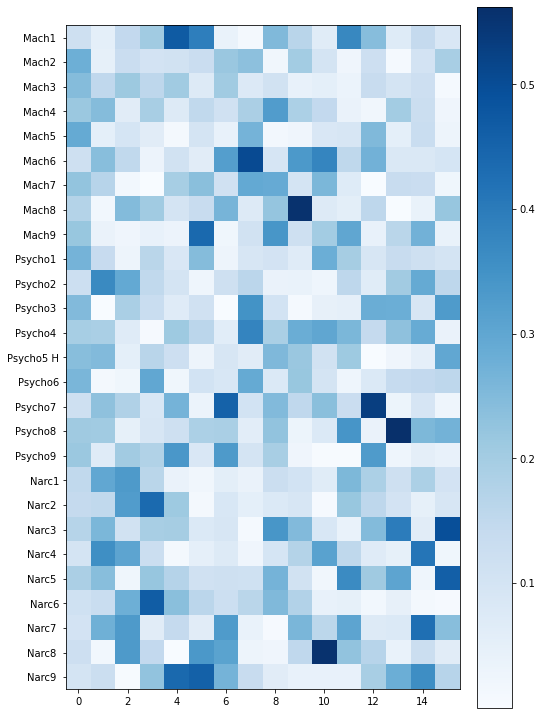

In [ ]:
plt.figure(figsize=(8, 200))
im = plt.imshow(np.abs(pca.components_.T), cmap = plt.cm.Blues)
plt.yticks(range(len(predictors)), predictors)
plt.colorbar(im,fraction=0.0785, pad=0.04)
plt.show()

In [ ]:
# total explained variance
total_explained_variance = sum(pca.explained_variance_ratio_)
print('Percentage of total variance explained by the first',n_comp,'components: ', str(round(total_explained_variance * 100, 2))+'%')

Percentage of total variance explained by the first 16 components:  83.03%


In [ ]:
# save the result onto the txt file
file.write('UNSUPERVISED WHOLE DATASET')
file.write('\n\n\nPercentage of total variance explained by the first ')
file.write(str(n_comp))
file.write(' components: ')
file.write(str(total_explained_variance))

18

We now want to reduce the number of selected components, retaining only the most relevant ones. To do this we look at the explained variance ratios.
In particular, our strategy is to keep a principal component as long as the related explained variance ratio is at most 5% smaller than the highest explained variance ratio.

In [ ]:
selected_eigenvectors = []
explained_variance = pca.explained_variance_ratio_

for i in range(len(explained_variance)):
    if explained_variance[0] - explained_variance[i] < 0.05:
        selected_eigenvectors.append(i)
    else:
        break

selected_eigenvectors

[0]

Now we start the feature selection by extracting the most relevant features from each one of the selected principal components.
In particular, for each principal component we extract those features associated with the 25% highest coefficients, in absolute value.

In [ ]:
features_extracted = np.zeros(pca.components_.shape[1])
for component in np.abs(pca.components_[selected_eigenvectors]):
    percentile = np.percentile(component, 75)    
    features_extracted = np.logical_or(features_extracted, component>=percentile)

features_pca = features_extracted
print('Features that are sufficiently relevant:\n\n', predictors[features_pca])

Features that are sufficiently relevant:

 Index(['Mach2 ', 'Mach3 ', 'Mach5 ', 'Psycho1 ', 'Psycho3 ', 'Psycho5 H',
       'Psycho6'],
      dtype='object')


In [ ]:
file.write('\n\nFeatures Selected via PCA: ')
file.write(str(list(predictors[features_pca])))

78

### Sparse PCA

A typical issue with PCA is that the principal components are usually combinations of the entire feature set, which may affect the interpretability of the model.
The Sparse PCA overcomes this disadvantage by finding linear combinations that contain just a few input variables.
In other words, in Sparse PCA the principal components tend to be sparse.

In the next cell we implement this algorithm:

In [ ]:
# get number of principal components equal to the 60%
# of the number of features in the original dataset
# of course we get the int number
n_comp = int(0.6 * X_train_val.shape[1])

sparse_pca = SparsePCA(n_components=n_comp, random_state=123, alpha=1)
sparse_pca.fit(X_train_val_scaled)

# the feature selection on sparse PCA is much simpler.
# For each principal component we retain only the features associated with non-zero coefficients 
features_extracted = np.zeros(sparse_pca.components_.shape[1])
for component in sparse_pca.components_:
    features_extracted += (component!=0)
print('\nNumber of times each feature appears in the selected components:\n\n',features_extracted)

# extract only those features whose frequencies are greater or equal than the mean frequency
features_sparse_pca = (features_extracted>=np.mean(features_extracted))
print('\n\nFeatures that appear a number of times greater than the mean frequency:\n\n', predictors[features_sparse_pca])


Number of times each feature appears in the selected components:

 [ 1.  6.  3.  2.  5.  1.  7.  1.  1. 10.  6.  3.  2.  7.  8.  1.  1.  3.
  4.  2.  1.  1.  2.  1.  1.  1.  1.]


Features that appear a number of times greater than the mean frequency:

 Index(['Mach2 ', 'Mach5 ', 'Mach7 ', 'Psycho1 ', 'Psycho2 ', 'Psycho5 H',
       'Psycho6', 'Narc1'],
      dtype='object')


To better understand SparsePCA and the difference sparsity induces on the principal components, let'have a look at the color matrix.

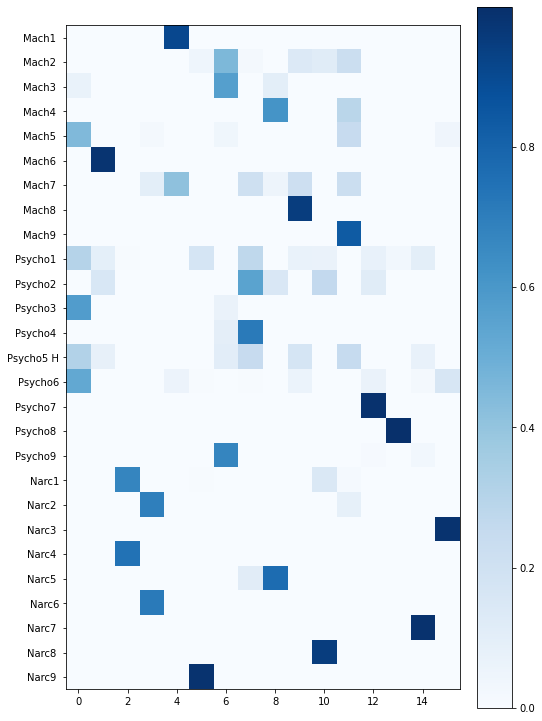

In [ ]:
plt.figure(figsize=(8, 200))
im = plt.imshow(np.abs(sparse_pca.components_.T), cmap = plt.cm.Blues)
plt.yticks(range(len(predictors)), predictors)
plt.colorbar(im,fraction=0.0785, pad=0.04)
plt.show()

In [ ]:
file.write('\n\nFeatures Selected via Sparse PCA: ')
file.write(str(list(predictors[features_sparse_pca])))

87

### Variance Thresholding

The last Unsupervised feature selection technique we are going to consider is Variance Thresholding, which removes features with sample variance lower than a fixed threshold:

In [ ]:
# VarianceThreshold approach

# first of all let's compute the variances
variances = np.var(X_train_val, axis=0)


# in the following we implement two different strategies to select a threshold
# just uncomment the one you want you use

# first approach to set a threshold
# alpha = 0.5
# threshold = (1-alpha)*np.min(variances)+alpha*np.max(variances)

# set a threshold using percentiles 
threshold = np.percentile(variances, 75)

# let's see the selected features
features_varthresh = (variances>=threshold)
print('Selected features based on variance thresholding:\n\n', predictors[features_varthresh])

Selected features based on variance thresholding:

 Index(['Mach2 ', 'Mach4 ', 'Mach5 ', 'Mach8 ', 'Mach9 ', 'Psycho1 ',
       'Psycho5 H'],
      dtype='object')


In [ ]:
file.write('\n\nFeatures Selected via Variance Thresholding: ')
file.write(str(list(predictors[features_varthresh])))

75

### Union to find best subset of features

To conclude this part, we now want to combine somehow the set or relevant predictors found by the various algorithms.
Our strategy is to take the union of said feature sets, and upon this union set apply Greedy Feature Selection techniques.

In [ ]:
# take the union among all the extracted features sets
# found through the different unsupervised learning techniques
features_set_unsup = np.logical_or(features_pca, features_sparse_pca, features_varthresh)
features_unsup = [i for i in range(len(features_set_unsup)) if features_set_unsup[i]==True]
features_selected = [predictors[i] for i in features_unsup]
print('Final set of features from Unsupervised Algorithms:\n\n', features_selected)

Final set of features from Unsupervised Algorithms:

 ['Mach2 ', 'Mach3 ', 'Mach5 ', 'Mach7 ', 'Psycho1 ', 'Psycho2 ', 'Psycho3 ', 'Psycho5 H', 'Psycho6', 'Narc1']


In [ ]:
file.write('\n\n(Union) Final set of features from Unsupervised Algorithms: ')
file.write(str(features_selected))

109

Finally, let's implement a Logistic Regression to check how this subset of features behaves.

In [ ]:
# logistic regression

max_iter = 1000
C = [0.01, 0.1, 1]
logreg_clf = LogisticRegressionCV(penalty='l2', Cs=C, max_iter=max_iter, cv=KFold())
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, features_unsup], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, features_unsup])
y_test_pred = logreg_clf.predict(X_test_scaled[:, features_unsup])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

Accuracy on train: 0.7636363636363637
Accuracy on test: 0.7628865979381443


In [ ]:
file.write('\n\nResult after applying Logistic Regression: \nOn train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nOn test: ')
file.write(str(np.mean(y_test==y_test_pred)))

18

Let's check whether we can further reduce this subset of features via greedy selection techniques. In particular we apply both Forward and Backward Selections, based on the accuracy score.

In [ ]:
lreg = LogisticRegression()

# apply Forward selection
sfs = SequentialFeatureSelector(lreg, direction='forward')
sfs.fit(X_train_val_scaled[:, features_unsup], y_train_val)
final_features_forward = [features_unsup[i] for i in range(len(features_unsup)) if sfs.get_support()[i]>0]
print('Final features after greedy forward selection: ', predictors[final_features_forward])

# fit the model once again
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, final_features_forward], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, final_features_forward])
y_test_pred = logreg_clf.predict(X_test_scaled[:, final_features_forward])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

/home/giangia/.local/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Final features after greedy forward selection:  Index(['Mach3 ', 'Psycho1 ', 'Psycho2 ', 'Psycho3 ', 'Psycho5 H'], dtype='object')
Accuracy on train: 0.7402597402597403
Accuracy on test: 0.7628865979381443


In [ ]:
file.write('\n\nFinal features after greedy forward selection: ')
file.write(str(list(predictors[final_features_forward])))
file.write('\nAccuracy on Train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nAccuracy on Test: ')
file.write(str(np.mean(y_test==y_test_pred)))

18

In [ ]:
# apply Backward selection
sfs = SequentialFeatureSelector(lreg, direction='backward')
sfs.fit(X_train_val_scaled[:, features_unsup], y_train_val)
final_features_backward = [features_unsup[i] for i in range(len(features_unsup)) if sfs.get_support()[i]>0]
print('Final features after greedy backward selection: ', predictors[final_features_backward])

# fit the model once again
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, final_features_backward], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, final_features_backward])
y_test_pred = logreg_clf.predict(X_test_scaled[:, final_features_backward])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

/home/giangia/.local/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Final features after greedy backward selection:  Index(['Mach2 ', 'Mach3 ', 'Mach7 ', 'Psycho5 H', 'Psycho6'], dtype='object')
Accuracy on train: 0.7298701298701299
Accuracy on test: 0.7010309278350515


In [ ]:
file.write('\n\nFinal features after greedy backward selection: ')
file.write(str(list(predictors[final_features_backward])))
file.write('\nAccuracy on Train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nAccuracy on Test: ')
file.write(str(np.mean(y_test==y_test_pred)))

18

### Venn Diagram

Now we want to look at the features shared across the different models implemented above. To do this we use a Venn Diagram.

In [ ]:
feats_pca = set([predictors[i] for i in range(len(features_pca)) if features_pca[i]==True])
feats_sparse_pca = set([predictors[i] for i in range(len(features_sparse_pca)) if features_sparse_pca[i]==True])
feats_varthresh = set([predictors[i] for i in range(len(features_varthresh)) if features_varthresh[i]==True])

print('Features shared:', feats_pca & feats_sparse_pca & feats_varthresh)

Features shared: {'Psycho1 ', 'Mach2 ', 'Mach5 ', 'Psycho5 H', 'Psycho6'}


/home/giangia/.local/lib/python3.10/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


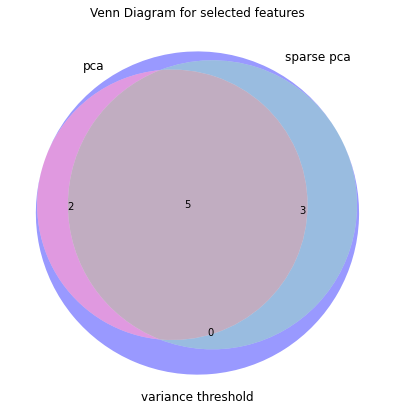

In [ ]:
plt.figure(figsize=(7, 7))
venn3([feats_pca, feats_sparse_pca, feats_varthresh], ('pca', 'sparse pca', 'variance threshold'))
plt.title('Venn Diagram for selected features')
plt.show()

In [ ]:
file.write('\n\nFeature shared across PCA, Sparse PCA and Variance Thresholding: ')
file.write(str(feats_pca & feats_sparse_pca & feats_varthresh))
file.write('\n\n\n')
file.write('_'*50)

50

## 3.2 Unsupervised Learning (Honest only)
So far, all the algorithms implemented have been applied to the entire dataset, consisting of honest and dishonest responses. 
Now we want to try something different, focusing separately on honest-only and dishonest-only responses and trying to infer a set of relevant predictors in these two different scenarios.
The idea is that if some features are relevant in both the case of honest-only and dishonest-only responses, then perhaps those features are not so useful for prediction purposes.
To begin with, we will focus only on the honest responses; in particular, we will implement the same algorithms and selection strategies used before.

### PCA

In [ ]:
# get number of principal components equal to the 60%
# of the number of features in the original dataset
# of course we get the int number
n_comp = int(0.6 * X_train_val.shape[1])

pca = PCA(n_components=n_comp, random_state=123)
pca.fit(X_train_val_scaled[y_train_val=='H'])

pca.explained_variance_ratio_

array([0.17484458, 0.09054053, 0.0672795 , 0.05992502, 0.05816154,
       0.0503356 , 0.04918496, 0.04160979, 0.04134258, 0.03756328,
       0.03237874, 0.03006075, 0.02797823, 0.02776303, 0.02356775,
       0.02262525])

In [ ]:
pca.components_

array([[ 5.58645002e-02,  3.06822446e-01,  2.80344948e-01,
         2.47151687e-01,  2.59196316e-01,  1.61324213e-01,
         1.24736030e-01,  1.87896342e-01,  1.20596220e-01,
         2.33493144e-01,  5.84411413e-02,  2.46269249e-01,
         2.43266425e-01,  1.73769974e-01,  2.23542362e-01,
         6.96336592e-02,  2.48969994e-01,  2.16713909e-01,
         1.73728870e-01,  1.66667989e-01,  1.72784372e-01,
         1.26296946e-01,  2.24608722e-01,  1.70686041e-01,
         1.84583655e-01,  1.08581166e-01,  5.92324630e-02],
       [-1.94612701e-01, -9.70193350e-02, -2.00698545e-01,
        -5.78866003e-02, -1.18638470e-01, -8.26422041e-02,
        -4.36157195e-02, -2.58195567e-01,  3.56645622e-02,
        -4.43384669e-02,  3.34106261e-01, -2.49764982e-01,
         1.37891406e-01, -1.52039780e-01, -7.92180971e-02,
         2.71950814e-01,  1.06163069e-01, -1.26119943e-01,
         2.31038545e-01,  3.59844588e-01,  1.47336810e-02,
         1.39356418e-01, -1.29187694e-02,  3.01116866e-

Again, let's have a look at the color matrix to understand how much influence each predictor exert on each one of the selected principal components.

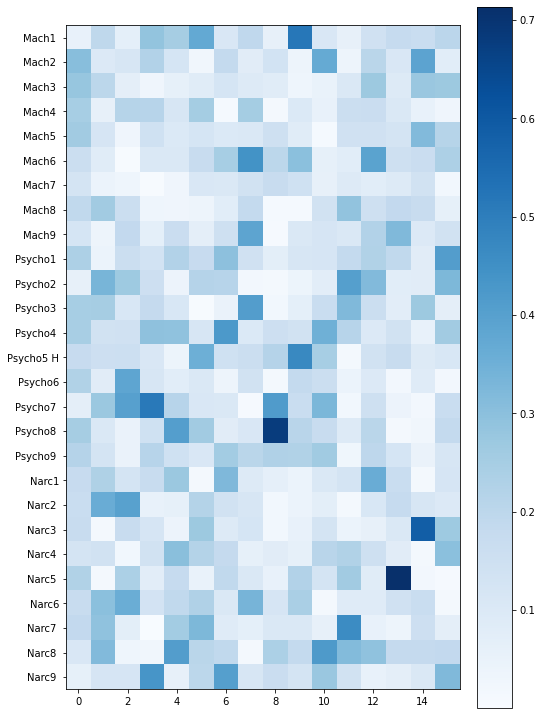

In [ ]:
plt.figure(figsize=(8, 200))
im = plt.imshow(np.abs(pca.components_.T), cmap = plt.cm.Blues)
plt.yticks(range(len(predictors)), predictors)
plt.colorbar(im,fraction=0.0785, pad=0.04)
plt.show()

In [ ]:
# check the sum over all explained variance
total_explained_variance = sum(pca.explained_variance_ratio_)
print('Percentage of total variance explained by the first',n_comp,'components :', str(round(total_explained_variance * 100,2))+'%')

Percentage of total variance explained by the first 16 components : 83.52%


In [ ]:
file.write('\n\n\nUNSUPERVISED HONEST ONLY')
file.write('\n\n\nPercentage of total variance explained by the first ')
file.write(str(n_comp))
file.write(' components: ')
file.write(str(total_explained_variance))

18

In the next cell we select the most influential principal components: in particular we select those components such that the difference between their explained variance ratio and the highest one is less than 5%:

In [ ]:
selected_eigenvectors = []
explained_variance = pca.explained_variance_ratio_

for i in range(len(explained_variance)):
    if explained_variance[0] - explained_variance[i] < 0.05:
        selected_eigenvectors.append(i)
    else:
        break

selected_eigenvectors

[0]

Then just as before, from each one of the selected principal components we extract a set of relevant predictors considering the loading factors.

In [ ]:
features_extracted = np.zeros(pca.components_.shape[1])
for component in np.abs(pca.components_[selected_eigenvectors]):
    percentile = np.percentile(component, 75)    
    features_extracted = np.logical_or(features_extracted, component>=percentile)

features_pca = features_extracted
print('Features that are sufficiently relevant:\n\n', predictors[features_pca])

Features that are sufficiently relevant:

 Index(['Mach2 ', 'Mach3 ', 'Mach4 ', 'Mach5 ', 'Psycho3 ', 'Psycho4 ',
       'Psycho8 '],
      dtype='object')


In [ ]:
file.write('\n\nFeatures Selected via PCA: ')
file.write(str(list(predictors[features_pca])))

76

### Sparse PCA

In [ ]:
# get number of principal components equal to the 60%
# of the number of features in the original dataset
# of course we get the int number
n_comp = int(0.6 * X_train_val.shape[1])

sparse_pca = SparsePCA(n_components=n_comp, random_state=123, alpha=1)
sparse_pca.fit(X_train_val_scaled[y_train_val == 'H'])

features_extracted = np.zeros(sparse_pca.components_.shape[1])
for component in sparse_pca.components_:
    features_extracted += (component!=0)
print('\nNumber of times each feature appears in the selected components:\n\n',features_extracted)

# extract only those features whose frequencies are greater or equal than the mean frequency
features_sparse_pca = (features_extracted>=np.mean(features_extracted))
print('\n\nFeatures that appear a number of times greater than the mean frequency:\n\n', predictors[features_sparse_pca])


Number of times each feature appears in the selected components:

 [1. 4. 3. 3. 3. 1. 3. 4. 2. 4. 3. 1. 2. 1. 6. 1. 1. 2. 1. 2. 1. 1. 1. 1.
 1. 1. 1.]


Features that appear a number of times greater than the mean frequency:

 Index(['Mach2 ', 'Mach3 ', 'Mach4 ', 'Mach5 ', 'Mach7 ', 'Mach8 ', 'Psycho1 ',
       'Psycho2 ', 'Psycho6'],
      dtype='object')


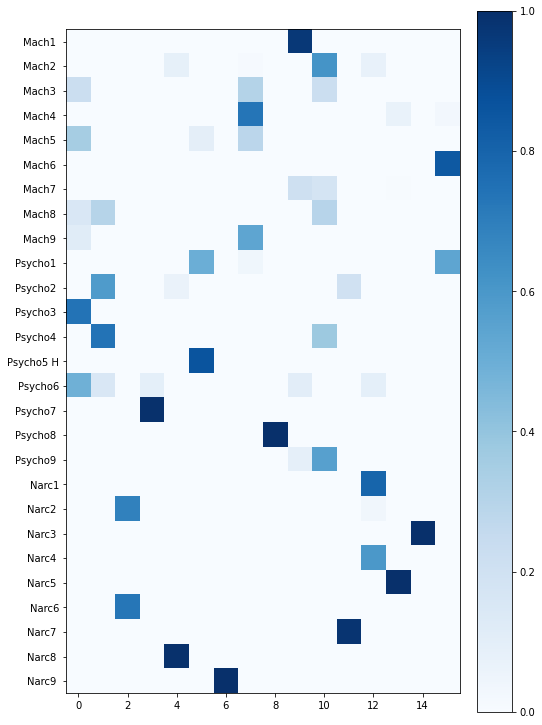

In [ ]:
plt.figure(figsize=(8, 200))
im = plt.imshow(np.abs(sparse_pca.components_.T), cmap = plt.cm.Blues)
plt.yticks(range(len(predictors)), predictors)
plt.colorbar(im,fraction=0.0785, pad=0.04)
plt.show()

In [ ]:
file.write('\n\nFeatures Selected via Sparse PCA: ')
file.write(str(list(predictors[features_sparse_pca])))

95

### Variance Thresholding

In [ ]:
# VarianceThreshold approach

# first of all let's compute the variances
variances = np.var(X_train_val[y_train_val == 'H'], axis=0)

# first approach to set a threshold
alpha = 0.5
threshold = (1-alpha)*np.min(variances)+alpha*np.max(variances)

# second approach to set a threshold
threshold = np.percentile(variances, 75)

# see the selected features
features_varthresh = (variances>=threshold)
print('Selected features based on variance thresholding:\n\n', predictors[features_varthresh])

Selected features based on variance thresholding:

 Index(['Mach2 ', 'Mach4 ', 'Mach5 ', 'Psycho1 ', 'Psycho5 H', 'Psycho8 ',
       'Narc6'],
      dtype='object')


In [ ]:
file.write('\n\nFeatures Selected via Variance Thresholding: ')
file.write(str(list(predictors[features_varthresh])))

76

### Union to find best subset of features

Once again we now combine the previous sets of features by taking the union set. Upon this union set we'll perform further Greedy Feature Selections.

In [ ]:
# take the union among all the extracted features sets
# found through the different unsupervised learning techniques
features_set_unsup = np.logical_or(features_pca, features_sparse_pca, features_varthresh)
features_unsup_honest = [i for i in range(len(features_set_unsup)) if features_set_unsup[i]==True]
features_selected_honest = [predictors[i] for i in features_unsup_honest]
print('Final set of features from Unsupervised Algorithms on Honest only:\n\n', features_selected_honest)

Final set of features from Unsupervised Algorithms on Honest only:

 ['Mach2 ', 'Mach3 ', 'Mach4 ', 'Mach5 ', 'Mach7 ', 'Mach8 ', 'Psycho1 ', 'Psycho2 ', 'Psycho3 ', 'Psycho4 ', 'Psycho6', 'Psycho8 ']


In [ ]:
file.write('\n\n(Union) Final set of features from Unsupervised Algorithms: ')
file.write(str(features_selected_honest))

131

Finally, let's implement a Logistic Regression to check how this subset of features behaves.

In [ ]:
# logistic regression

max_iter = 1000
C = [0.01, 0.1, 1]
logreg_clf = LogisticRegressionCV(penalty='l2', Cs=C, max_iter=max_iter, cv=KFold())
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, features_unsup_honest], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, features_unsup_honest])
y_test_pred = logreg_clf.predict(X_test_scaled[:, features_unsup_honest])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

Accuracy on train: 0.7038961038961039
Accuracy on test: 0.7216494845360825


In [ ]:
file.write('\n\nResult after applying Logistic Regression: \nOn train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nOn test: ')
file.write(str(np.mean(y_test==y_test_pred)))

18

Let's check whether we can further reduce this subset of features via greedy selection techniques. In particular we apply both Forward and Backward Selections, based on the accuracy score.

In [ ]:
lreg = LogisticRegression()

# apply Forward selection
sfs = SequentialFeatureSelector(lreg, direction='forward')
sfs.fit(X_train_val_scaled[:, features_unsup_honest], y_train_val)
final_features_forward = [features_unsup_honest[i] for i in range(len(features_unsup_honest)) if sfs.get_support()[i]>0]
print('Final features after greedy forward selection: ', predictors[final_features_forward])

# fit the model once again
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, final_features_forward], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, final_features_forward])
y_test_pred = logreg_clf.predict(X_test_scaled[:, final_features_forward])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

/home/giangia/.local/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Final features after greedy forward selection:  Index(['Mach4 ', 'Mach8 ', 'Psycho1 ', 'Psycho3 ', 'Psycho4 ', 'Psycho6'], dtype='object')
Accuracy on train: 0.6961038961038961
Accuracy on test: 0.6907216494845361


In [ ]:
file.write('\n\nFinal features after greedy forward selection: ')
file.write(str(list(predictors[final_features_forward])))
file.write('\nAccuracy on Train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nAccuracy on Test: ')
file.write(str(np.mean(y_test==y_test_pred)))

18

In [ ]:
# apply Backward selection
sfs = SequentialFeatureSelector(lreg, direction='backward')
sfs.fit(X_train_val_scaled[:, features_unsup_honest], y_train_val)
final_features_backward = [features_unsup_honest[i] for i in range(len(features_unsup_honest)) if sfs.get_support()[i]>0]
print('Final features after greedy backward selection: ', predictors[final_features_backward])

# fit the model once again
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, final_features_backward], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, final_features_backward])
y_test_pred = logreg_clf.predict(X_test_scaled[:, final_features_backward])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

/home/giangia/.local/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Final features after greedy backward selection:  Index(['Mach3 ', 'Mach7 ', 'Psycho1 ', 'Psycho2 ', 'Psycho3 ', 'Psycho8 '], dtype='object')
Accuracy on train: 0.7090909090909091
Accuracy on test: 0.7422680412371134


In [ ]:
file.write('\n\nFinal features after greedy backward selection: ')
file.write(str(list(predictors[final_features_backward])))
file.write('\nAccuracy on Train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nAccuracy on Test: ')
file.write(str(np.mean(y_test==y_test_pred)))

file.write('\n\n\n')
file.write('_'*50)

50

## 3.3 Unsupervised Learning (Dishonest only)

Now we repeat everything once again, but this time focusing on Dishonest responses only. We apply the exact same algorithms and selection strategies applied before.

### PCA

In [ ]:
# get number of principal components equal to the 60%
# of the number of features in the original dataset
# of course we get the int number
n_comp = int(0.6 * X_train_val.shape[1])

pca = PCA(n_components=n_comp, random_state=123)
pca.fit(X_train_val_scaled[y_train_val=='D'])

pca.explained_variance_ratio_

array([0.24040285, 0.10828987, 0.07487556, 0.05602593, 0.05249664,
       0.04756864, 0.04145001, 0.03859591, 0.0334385 , 0.0309797 ,
       0.02826127, 0.02611253, 0.02363426, 0.02197917, 0.02105085,
       0.0186821 ])

In [ ]:
pca.components_

array([[ 1.28556282e-01,  2.56210439e-01,  2.75260726e-01,
         2.28562374e-01,  2.83061442e-01,  1.60145784e-01,
         2.28452024e-01,  1.51843901e-01,  2.42907674e-01,
         2.28550872e-01,  5.38864576e-02,  2.43000164e-01,
         1.22478315e-01,  1.66727749e-01,  2.77704608e-01,
         1.03086798e-01,  1.29567624e-01,  2.58673508e-01,
         1.71813998e-01,  1.01305216e-01,  2.42848386e-01,
         1.42423052e-01,  2.33029098e-01,  8.11125457e-02,
         1.21713474e-01,  9.60000459e-02,  1.31948597e-01],
       [ 3.21688911e-02,  6.01865300e-02, -9.83928106e-03,
        -1.98049914e-01,  9.51598341e-02, -1.46906227e-01,
         2.27199986e-01,  1.62644567e-01,  6.70545146e-02,
         1.43677078e-01,  2.99003157e-01,  8.88926037e-02,
         1.72130337e-01,  2.07190025e-01,  2.12222790e-02,
         2.12944774e-01,  2.00724447e-01,  7.87710153e-02,
        -3.58620188e-01,  1.60703980e-01, -2.48350619e-01,
        -4.07423001e-01, -2.22958809e-01,  1.38912560e-

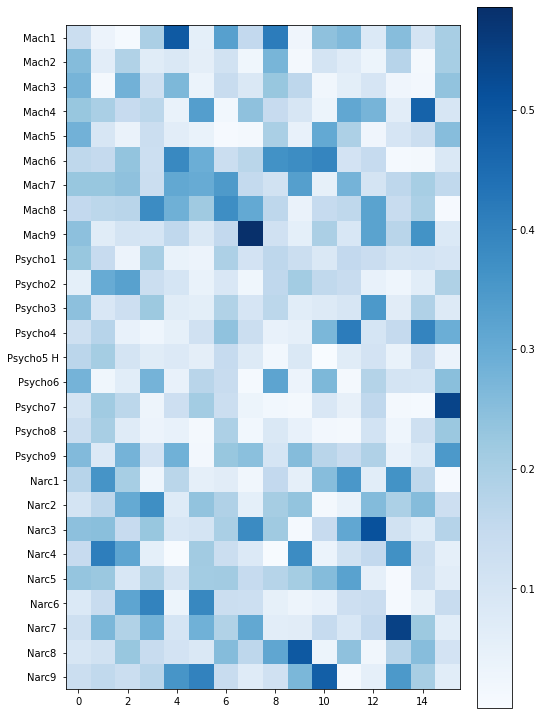

In [ ]:
plt.figure(figsize=(8, 200))
im = plt.imshow(np.abs(pca.components_.T), cmap = plt.cm.Blues)
plt.yticks(range(len(predictors)), predictors)
plt.colorbar(im,fraction=0.0785, pad=0.04)
plt.show()

In [ ]:
# see the sum over all explained variance
total_explained_variance = sum(pca.explained_variance_ratio_)
print('Percentage of total variance explained by the first',n_comp,'components :', str(round(total_explained_variance * 100,2))+'%')

Percentage of total variance explained by the first 16 components : 86.38%


In [ ]:
file.write('\n\n\nUNSUPERVISED DISHONEST ONLY')
file.write('\n\n\nPercentage of total variance explained by the first ')
file.write(str(n_comp))
file.write(' components: ')
file.write(str(total_explained_variance))

17

In the next cell we select the most influential principal components: in particular we select those components such that the difference between their explained variance ratio and the highest one is less than 5%:

In [ ]:
selected_eigenvectors = []
explained_variance = pca.explained_variance_ratio_

for i in range(len(explained_variance)):
    if explained_variance[0] - explained_variance[i] < 0.05:
        selected_eigenvectors.append(i)
    else:
        break

selected_eigenvectors

[0]

Then, we extract the most relevant features from each one of the selected components.

In [ ]:
features_extracted = np.zeros(pca.components_.shape[1])
for component in np.abs(pca.components_[selected_eigenvectors]):
    percentile = np.percentile(component, 75)    
    features_extracted = np.logical_or(features_extracted, component>=percentile)

features_pca = features_extracted
print('Features that are sufficiently relevant:\n\n', predictors[features_pca])

Features that are sufficiently relevant:

 Index(['Mach2 ', 'Mach3 ', 'Mach5 ', 'Mach9 ', 'Psycho3 ', 'Psycho6',
       'Psycho9 '],
      dtype='object')


In [ ]:
file.write('\n\nFeatures Selected via PCA: ')
file.write(str(list(predictors[features_pca])))

75

### Sparse PCA

In [ ]:
# get number of principal components equal to the 60%
# of the number of features in the original dataset
# of course we get the int number
n_comp = int(0.6 * X_train_val.shape[1])

sparse_pca = SparsePCA(n_components=n_comp, random_state=123, alpha=1)
sparse_pca.fit(X_train_val_scaled[y_train_val == 'D'])

features_extracted = np.zeros(sparse_pca.components_.shape[1])
for component in sparse_pca.components_:
    features_extracted += (component!=0)
print('\nNumber of times each feature appears in the selected components:\n\n',features_extracted)

# extract only those features whose frequencies are greater or equal than the mean frequency
features_sparse_pca = (features_extracted>=np.mean(features_extracted))
print('\n\nFeatures that appear a number of times greater than the mean frequency:\n\n', predictors[features_sparse_pca])


Number of times each feature appears in the selected components:

 [1. 6. 2. 1. 5. 1. 1. 1. 1. 5. 5. 2. 3. 4. 4. 1. 5. 3. 4. 1. 1. 1. 4. 1.
 1. 1. 1.]


Features that appear a number of times greater than the mean frequency:

 Index(['Mach2 ', 'Mach5 ', 'Psycho1 ', 'Psycho2 ', 'Psycho4 ', 'Psycho5 H',
       'Psycho6', 'Psycho8 ', 'Psycho9 ', 'Narc1', 'Narc5 '],
      dtype='object')


Once again, let' take a look at the color matrix.

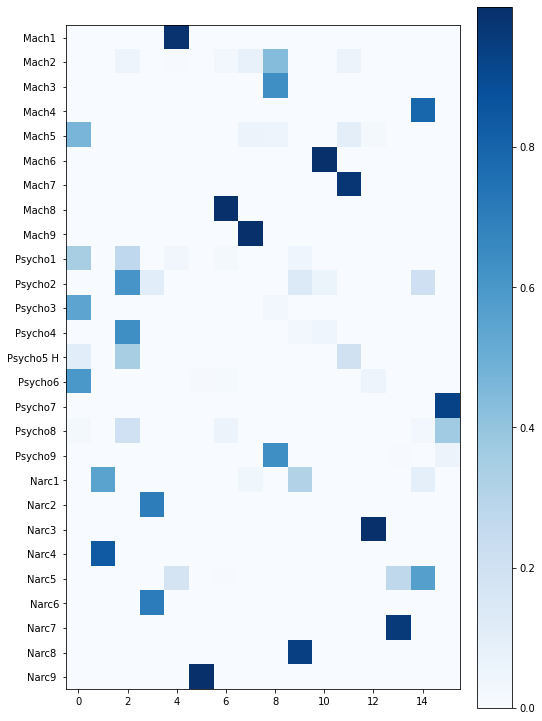

In [ ]:
plt.figure(figsize=(8, 200))
im = plt.imshow(np.abs(sparse_pca.components_.T), cmap = plt.cm.Blues)
plt.yticks(range(len(predictors)), predictors)
plt.colorbar(im,fraction=0.0785, pad=0.04)
plt.show()

In [ ]:
file.write('\n\nFeatures Selected via Sparse PCA: ')
file.write(str(list(predictors[features_sparse_pca])))

123

### Variance Thresholding

In [ ]:
# VarianceThreshold approach

# first of all let's compute the variances
variances = np.var(X_train_val[y_train_val == 'D'], axis=0)

# first approach to set a threshold
alpha = 0.5
threshold = (1-alpha)*np.min(variances)+alpha*np.max(variances)

# second approach to set a threshold
threshold = np.percentile(variances, 75)

# see the selected features
features_varthresh = (variances>=threshold)
print('Selected features based on variance thresholding:\n\n', predictors[features_varthresh])

Selected features based on variance thresholding:

 Index(['Mach4 ', 'Mach5 ', 'Mach7 ', 'Mach8 ', 'Mach9 ', 'Psycho9 ', 'Narc5 '], dtype='object')


In [ ]:
file.write('\n\nFeatures Selected via Variance Thresholding: ')
file.write(str(list(predictors[features_varthresh])))

72

### Union to find best subset of features

Just as before, let's take the union set of the sets of features found by the various algorithms. Upon this union set we will perform further Greedy Feature Selections.

In [ ]:
# take the union among all the extracted features sets
# found through the different unsupervised learning techniques
features_set_unsup = np.logical_or(features_pca, features_sparse_pca, features_varthresh)
features_unsup_dishonest = [i for i in range(len(features_set_unsup)) if features_set_unsup[i]==True]
features_selected_dishonest = [predictors[i] for i in features_unsup_dishonest]
print('Final set of features from Unsupervised Algorithms on Dishonest:\n\n', features_selected_dishonest)

Final set of features from Unsupervised Algorithms on Dishonest:

 ['Mach2 ', 'Mach3 ', 'Mach5 ', 'Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho3 ', 'Psycho4 ', 'Psycho5 H', 'Psycho6', 'Psycho8 ', 'Psycho9 ', 'Narc1', 'Narc5 ']


In [ ]:
file.write('\n\n(Union) Final set of features from Unsupervised Algorithms: ')
file.write(str(features_selected_dishonest))

155

Finally, let's implement a Logistic Regression to check how this subset of features behaves.

In [ ]:
# logistic regression

max_iter = 1000
C = [0.01, 0.1, 1]
logreg_clf = LogisticRegressionCV(penalty='l2', Cs=C, max_iter=max_iter, cv=KFold())
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, features_unsup_dishonest], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, features_unsup_dishonest])
y_test_pred = logreg_clf.predict(X_test_scaled[:, features_unsup_dishonest])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

Accuracy on train: 0.7558441558441559
Accuracy on test: 0.7422680412371134


In [ ]:
file.write('\n\nResult after applying Logistic Regression: \nOn train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nOn test: ')
file.write(str(np.mean(y_test==y_test_pred)))

18

Let's check whether we can further reduce this subset of features via greedy selection techniques. In particular we apply both Forward and Backward Selections, based on the accuracy score.

In [ ]:
lreg = LogisticRegression()

# apply Forward selection
sfs = SequentialFeatureSelector(lreg, direction='forward')
sfs.fit(X_train_val_scaled[:, features_unsup_dishonest], y_train_val)
final_features_forward = [features_unsup_dishonest[i] for i in range(len(features_unsup_dishonest)) if sfs.get_support()[i]>0]
print('Final features after greedy forward selection: ', predictors[final_features_forward])

# fit the model once again
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, final_features_forward], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, final_features_forward])
y_test_pred = logreg_clf.predict(X_test_scaled[:, final_features_forward])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

/home/giangia/.local/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Final features after greedy forward selection:  Index(['Mach3 ', 'Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho4 ', 'Psycho5 H',
       'Psycho8 '],
      dtype='object')
Accuracy on train: 0.7662337662337663
Accuracy on test: 0.7319587628865979


In [ ]:
file.write('\n\nFinal features after greedy forward selection: ')
file.write(str(list(predictors[final_features_forward])))
file.write('\nAccuracy on Train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nAccuracy on Test: ')
file.write(str(np.mean(y_test==y_test_pred)))

18

In [ ]:
# apply Backward selection
sfs = SequentialFeatureSelector(lreg, direction='backward')
sfs.fit(X_train_val_scaled[:, features_unsup_dishonest], y_train_val)
final_features_backward = [features_unsup_dishonest[i] for i in range(len(features_unsup_dishonest)) if sfs.get_support()[i]>0]
print('Final features after greedy backward selection: ', predictors[final_features_backward])

# fit the model once again
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, final_features_backward], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, final_features_backward])
y_test_pred = logreg_clf.predict(X_test_scaled[:, final_features_backward])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

/home/giangia/.local/lib/python3.10/site-packages/sklearn/feature_selection/_sequential.py:188: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


Final features after greedy backward selection:  Index(['Mach3 ', 'Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho5 H', 'Psycho6',
       'Psycho8 '],
      dtype='object')
Accuracy on train: 0.7688311688311689
Accuracy on test: 0.7216494845360825


In [ ]:
file.write('\n\nFinal features after greedy backward selection: ')
file.write(str(list(predictors[final_features_backward])))
file.write('\nAccuracy on Train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nAccuracy on Test: ')
file.write(str(np.mean(y_test==y_test_pred)))

file.write('\n\n\n')
file.write('_'*50)

50

## 3.4 Venn Diagram for all cases (Whole Dataset, Honest only, Dishonest only)

Let's now look at the distribution of features across the three different scenarios we examined. To easily check for common predictors we use a Venn Diagram.

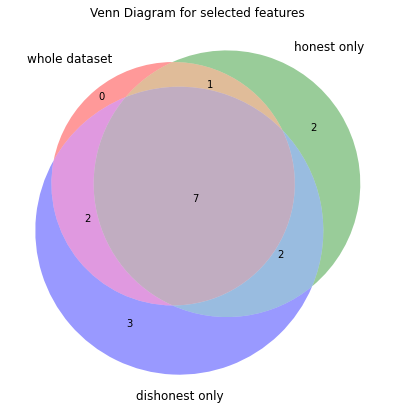

In [ ]:
plt.figure(figsize=(7, 7))
venn3([set(features_selected), set(features_selected_honest), set(features_selected_dishonest)], ('whole dataset', 'honest only', 'dishonest only'))
plt.title('Venn Diagram for selected features')
plt.show()

In [ ]:
print('Features shared:', set(features_selected) & set(features_selected_honest) & set(features_selected_dishonest))

Features shared: {'Psycho3 ', 'Psycho1 ', 'Psycho2 ', 'Mach3 ', 'Mach2 ', 'Mach5 ', 'Psycho6'}


In [ ]:
file.write('\n\nFeature shared across whole dataset, Honest-only, Dishonest-only: ')
file.write(str(set(features_selected) & set(features_selected_honest) & set(features_selected_dishonest)))

77

Since there might be some features shared across whole dataset, honest only and dishonest only, this could suggest that such features may be not relevant to discriminate honest answers from dishonest ones. Thus, in the next cell, we implement a simple Logistic Regression using only those predictors which are NOT shared by all the three cases.

In [ ]:
# logistic regression

# take those features not shared by all the three cases
intersection = set(features_unsup) & set(features_unsup_honest) & set(features_unsup_dishonest)
union = set(features_unsup) | set(features_unsup_honest) | set(features_unsup_dishonest)
features_NOT_shared = list(union - intersection)

max_iter = 1000
C = [0.01, 0.1, 1]
logreg_clf = LogisticRegressionCV(penalty='l2', Cs=C, max_iter=max_iter, cv=KFold())
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, features_NOT_shared], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, features_NOT_shared])
y_test_pred = logreg_clf.predict(X_test_scaled[:, features_NOT_shared])

print('Accuracy on train:', np.mean(y_train_val==y_train_val_pred))
print('Accuracy on test:', np.mean(y_test==y_test_pred))

Accuracy on train: 0.7350649350649351
Accuracy on test: 0.6701030927835051


In [ ]:
file.write('\n\nLogistic Regression on NOT shared features: ')
file.write(str(list(predictors[features_NOT_shared])))
file.write('\nAccuracy on Train: ')
file.write(str(np.mean(y_train_val==y_train_val_pred)))
file.write('\nAccuracy on Test: ')
file.write(str(np.mean(y_test==y_test_pred)))

file.write('\n\n\n')
file.write('_'*50)

50

## 4. Supervised Feature Selection 

In this section we move on to Supervised Learning algorithms. The algorithms we are going to analyze are:
- Logistic Regression;
- Support Vector Machine;
- Decision Tree;
- Random Forest;
- Gradient Boosting.

In order to assess the stability of the coefficients found by the models, for each one of such algorithms we also apply a Permutation Importance strategy.
We then combine the model coefficients with the Permutation Importance values in order to extract a set of relevant features from each algorithm.
Then again, we take the union of the found sets of features, and upon this union set we further apply Greedy Feature Selection techniques.
In particular we implemented 4 different Greedy Feature Selection strategies:
- Greedy Feature Selection using Akaike's Information Criterion;
- Greedy Feature Selection using p-values;
- Greedy Forward Feature Selection;
- Greedy Backward Feature Selection.

All these feature selection strategies are built upon a Logistic Regression classifier. 

### Logistic Regression

In the next cell we fit a Logistic Regression. In particular, to carry out feature selection we consider the Lasso Regularization; in this way we expect some of the coefficients will be set to zero. Then we make predictions both on Training and Test sets:

In [ ]:
# logistic regression

max_iter = 1000
C = 0.1
logreg_clf = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=max_iter)
logreg_clf = logreg_clf.fit(X_train_val_scaled, y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled)
y_test_pred = logreg_clf.predict(X_test_scaled)

acc_logreg_train = np.mean(y_train_val==y_train_val_pred)
acc_logreg_test =  np.mean(y_test==y_test_pred)

print('Accuracy on train:', acc_logreg_train)
print('Accuracy on test:', acc_logreg_test)

Accuracy on train: 0.7506493506493507
Accuracy on test: 0.7216494845360825


In [ ]:
print('Logistic Regression coefficients:\n\n', logreg_clf.coef_)

Logistic Regression coefficients:

 [[ 0.          0.02856925  0.          0.02334553  0.02991761 -0.03006303
   0.22057314  0.          0.17042847  0.1795043   0.31333791  0.01759121
   0.          0.58127517  0.          0.          0.1726532   0.
   0.          0.         -0.0574599   0.         -0.02119248  0.
  -0.05736307  0.13115204  0.        ]]


To assess the stability of the found coefficients, we also consider the Permutation Importance technique:

In [ ]:
logreg_clf_permut = permutation_importance(logreg_clf, X_train_val_scaled, y_train_val, n_repeats=100, random_state=0)

In [ ]:
logreg_clf_feature_sorted = {}

for i in range(len(logreg_clf.coef_[0])):
  logreg_clf_feature_sorted[i] = [np.abs(logreg_clf.coef_[0][i]), logreg_clf_permut.importances_mean[i], logreg_clf_permut.importances_std[i]]

# convert dictionary to dataframe 
logreg_clf_feature_sorted = pd.DataFrame.from_dict(logreg_clf_feature_sorted, orient='index')

# sort the dataframe 
# decreasing order w.r.t. |coeff| value
# decreasing order w.r.t. permut_importance
# increasing order w.r.t. permut_std

logreg_clf_feature_sorted  = logreg_clf_feature_sorted.sort_values([0, 1, 2], ascending = [False, False, True])
logreg_clf_feature_sorted.columns = ['|Coeff.|', 'P.I. Mean', 'P.I. std']

print(logreg_clf_feature_sorted)

    |Coeff.|  P.I. Mean  P.I. std
13  0.581275   0.075974  0.019148
10  0.313338   0.022675  0.012243
6   0.220573  -0.000675  0.009370
9   0.179504   0.011688  0.008445
16  0.172653   0.009922  0.008586
8   0.170428   0.004234  0.008036
25  0.131152  -0.000442  0.006804
20  0.057460  -0.000779  0.004339
24  0.057363  -0.005377  0.004427
5   0.030063  -0.004623  0.003610
4   0.029918  -0.000727  0.002651
1   0.028569   0.001870  0.002411
3   0.023346  -0.000312  0.002630
22  0.021192  -0.004935  0.002366
11  0.017591  -0.002831  0.002439
0   0.000000   0.000000  0.000000
2   0.000000   0.000000  0.000000
7   0.000000   0.000000  0.000000
12  0.000000   0.000000  0.000000
14  0.000000   0.000000  0.000000
15  0.000000   0.000000  0.000000
17  0.000000   0.000000  0.000000
18  0.000000   0.000000  0.000000
19  0.000000   0.000000  0.000000
21  0.000000   0.000000  0.000000
23  0.000000   0.000000  0.000000
26  0.000000   0.000000  0.000000


Now we get the first 20% of features with $|Coeff.| > 0$ and $P.I. Mean > 0$:



In [ ]:
k = 20/100*X_train_val.shape[1]

mask1 = np.abs(logreg_clf_feature_sorted.iloc[:,0])>0
mask2 = logreg_clf_feature_sorted.iloc[:,1]>0
logreg_features = logreg_clf_feature_sorted[np.logical_and(mask1, mask2)].index[:int(k)]

features_selected = [predictors[i] for i in logreg_features]
print('Features selected via Logistic Regression:', features_selected)

Features selected via Logistic Regression: ['Psycho5 H', 'Psycho2 ', 'Psycho1 ', 'Psycho8 ', 'Mach9 ']


In [ ]:
file.write('\n\n\n\nSUPERVISED LEARNING')
file.write('\n\n\nLogistic Regression')
file.write('\nAccuracy on Train: ')
file.write(str(acc_logreg_train))
file.write('\nAccuracy on Test: ')
file.write(str(acc_logreg_test))
file.write('\nFeatures selected: ')
file.write(str(features_selected))

59

### SVM with Lasso regularization

Now we implement the Support Vector Machine; also in this case we consider the Lasso Regularization, and again we make predictions both on Training and Test sets:

In [ ]:
max_iter = 1000
C = 0.01
svm_clf = LinearSVC(penalty='l1', loss='squared_hinge', C=C, dual=False, max_iter=max_iter)
svm_clf = svm_clf.fit(X_train_val_scaled, y_train_val)
y_train_val_pred = svm_clf.predict(X_train_val_scaled)
y_test_pred = svm_clf.predict(X_test_scaled)

acc_svm_train = np.mean(y_train_val==y_train_val_pred)
acc_svm_test =  np.mean(y_test==y_test_pred)

print('Accuracy on train:', acc_svm_train)
print('Accuracy on test:', acc_svm_test)

Accuracy on train: 0.7506493506493507
Accuracy on test: 0.7319587628865979


In [ ]:
print('SVM coefficients:\n\n',svm_clf.coef_)

SVM coefficients:

 [[0.         0.         0.         0.         0.         0.
  0.05051025 0.         0.02987233 0.05061821 0.09719098 0.
  0.         0.24381035 0.         0.         0.03616987 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


To assess the stability of the found coefficients, once again we consider the Permutation Importance technique:

In [ ]:
svm_clf_permut = permutation_importance(svm_clf, X_train_val_scaled, y_train_val, n_repeats=100, random_state=0)

In [ ]:
svm_clf_feature_sorted = {}

for i in range(len(svm_clf.coef_[0])):
  svm_clf_feature_sorted[i] = [np.abs(svm_clf.coef_[0][i]), svm_clf_permut.importances_mean[i], svm_clf_permut.importances_std[i]]

# convert dictionary to dataframe 
svm_clf_feature_sorted = pd.DataFrame.from_dict(svm_clf_feature_sorted, orient='index')

# sort the dataframe 
# decreasing order w.r.t. |coeff| value
# decreasing order w.r.t. permut_importance
# increasing order w.r.t. permut_std

svm_clf_feature_sorted  = svm_clf_feature_sorted.sort_values([0, 1, 2], ascending = [False, False, True])
svm_clf_feature_sorted.columns = ['|Coeff.|', 'P.I. Mean', 'P.I. std']
print(svm_clf_feature_sorted)

    |Coeff.|  P.I. Mean  P.I. std
13  0.243810   0.153481  0.023874
10  0.097191   0.031117  0.011099
9   0.050618   0.013403  0.008228
6   0.050510   0.011818  0.007359
16  0.036170   0.008026  0.006754
8   0.029872   0.007922  0.006387
0   0.000000   0.000000  0.000000
1   0.000000   0.000000  0.000000
2   0.000000   0.000000  0.000000
3   0.000000   0.000000  0.000000
4   0.000000   0.000000  0.000000
5   0.000000   0.000000  0.000000
7   0.000000   0.000000  0.000000
11  0.000000   0.000000  0.000000
12  0.000000   0.000000  0.000000
14  0.000000   0.000000  0.000000
15  0.000000   0.000000  0.000000
17  0.000000   0.000000  0.000000
18  0.000000   0.000000  0.000000
19  0.000000   0.000000  0.000000
20  0.000000   0.000000  0.000000
21  0.000000   0.000000  0.000000
22  0.000000   0.000000  0.000000
23  0.000000   0.000000  0.000000
24  0.000000   0.000000  0.000000
25  0.000000   0.000000  0.000000
26  0.000000   0.000000  0.000000


Now we get only first 20% of features which have both $|Coeff.| > 0$ and $P.I. Mean > 0$:

In [ ]:
k = 20/100*X_train_val.shape[1]

mask1 = np.abs(svm_clf_feature_sorted.iloc[:,0])>0
mask2 = svm_clf_feature_sorted.iloc[:,1]>0
svm_features = svm_clf_feature_sorted[np.logical_and(mask1, mask2)].index[:int(k)]

features_selected = [predictors[i] for i in svm_features]
print('Features selected via SVM:', features_selected)

Features selected via SVM: ['Psycho5 H', 'Psycho2 ', 'Psycho1 ', 'Mach7 ', 'Psycho8 ']


In [ ]:
file.write('\n\nSupport Vector Machine')
file.write('\nAccuracy on Train: ')
file.write(str(acc_svm_train))
file.write('\nAccuracy on Test: ')
file.write(str(acc_svm_test))
file.write('\nFeatures selected: ')
file.write(str(features_selected))

59

Now we move on the Tree-based algorithms.

### Decision Tree

Let's first fit a Decision Tree:

In [ ]:
tree_clf = tree.DecisionTreeClassifier(random_state=39)
tree_clf = tree_clf.fit(X_train_val, y_train_val)
y_train_val_pred = tree_clf.predict(X_train_val)
y_test_pred = tree_clf.predict(X_test)

acc_tree_train = np.mean(y_train_val==y_train_val_pred)
acc_tree_test =  np.mean(y_test==y_test_pred)

print('Accuracy on train:', acc_tree_train)
print('Accuracy on test:', acc_tree_test)

Accuracy on train: 1.0
Accuracy on test: 0.6288659793814433


In [ ]:
print('Feature importances:\n\n', tree_clf.feature_importances_)

Feature importances:

 [0.01806077 0.         0.01671573 0.02578998 0.02899035 0.05171956
 0.05789359 0.02476528 0.05288997 0.04616054 0.12898527 0.01402683
 0.02328792 0.20059463 0.01667551 0.03682451 0.02606063 0.05222333
 0.02961219 0.02046563 0.00519512 0.0320632  0.01523902 0.02287952
 0.01133481 0.02841603 0.01313008]


Apply permutation importance:

In [ ]:
tree_clf_permut = permutation_importance(tree_clf, X_train_val, y_train_val, n_repeats=100, random_state=0)

In [ ]:
tree_clf_feature_sorted = {}

for i in range(len(tree_clf.feature_importances_)):
  tree_clf_feature_sorted[i] = [tree_clf.feature_importances_[i], tree_clf_permut.importances_mean[i], tree_clf_permut.importances_std[i]]

# convert dictionary to dataframe 
tree_clf_feature_sorted = pd.DataFrame.from_dict(tree_clf_feature_sorted, orient='index')

# sort the dataframe 
# decreasing order w.r.t. coeff value
# decreasing order w.r.t. permut_importance
# increasing order w.r.t. permut_std

tree_clf_feature_sorted  = tree_clf_feature_sorted.sort_values([0, 1, 2], ascending = [False, False, True])
tree_clf_feature_sorted.columns = ['Importance', 'P.I. Mean', 'P.I. std']
print(tree_clf_feature_sorted)

    Importance  P.I. Mean  P.I. std
13    0.200595   0.261273  0.016697
10    0.128985   0.127870  0.012835
6     0.057894   0.129247  0.012294
8     0.052890   0.087091  0.009383
17    0.052223   0.037117  0.006491
5     0.051720   0.041532  0.008340
9     0.046161   0.048260  0.007256
15    0.036825   0.067117  0.009115
21    0.032063   0.021532  0.004946
18    0.029612   0.025896  0.006378
4     0.028990   0.039143  0.006574
25    0.028416   0.064753  0.009324
16    0.026061   0.046727  0.007709
3     0.025790   0.054208  0.008045
7     0.024765   0.034494  0.007028
12    0.023288   0.016260  0.004084
23    0.022880   0.015844  0.004260
19    0.020466   0.019325  0.004836
0     0.018061   0.028130  0.006136
2     0.016716   0.027117  0.005949
14    0.016676   0.053091  0.007340
22    0.015239   0.016364  0.005057
11    0.014027   0.008727  0.003809
26    0.013130   0.018494  0.004807
24    0.011335   0.014831  0.003250
20    0.005195   0.002494  0.001834
1     0.000000   0.000000  0

Now extract the relevant features by considering the predictors corresponding to the 20% highest values for Feature Importance and P.I. Mean.

In [ ]:
k = 20/100*len(tree_clf.feature_importances_)
tree_features = tree_clf_feature_sorted.iloc[:int(k), :].index

features_selected = [predictors[i] for i in tree_features]
print('Features selected via Decision Tree:', features_selected)

Features selected via Decision Tree: ['Psycho5 H', 'Psycho2 ', 'Mach7 ', 'Mach9 ', 'Psycho9 ']


In [ ]:
file.write('\n\nDecision Tree')
file.write('\nAccuracy on Train: ')
file.write(str(acc_tree_train))
file.write('\nAccuracy on Test: ')
file.write(str(acc_tree_test))
file.write('\nFeatures selected: ')
file.write(str(features_selected))

57

### Random Forest 

Now we implement the Random Forest algorithm:

In [ ]:
n_ests = 100
forest_clf = RandomForestClassifier(n_estimators=n_ests, random_state=39)
forest_clf = forest_clf.fit(X_train_val, y_train_val)
y_train_val_pred = forest_clf.predict(X_train_val)
y_test_pred = forest_clf.predict(X_test)

acc_forest_train = np.mean(y_train_val==y_train_val_pred)
acc_forest_test =  np.mean(y_test==y_test_pred)

print('Accuracy on train:', acc_forest_train)
print('Accuracy on test:', acc_forest_test)

Accuracy on train: 1.0
Accuracy on test: 0.7525773195876289


In [ ]:
print('Feature importances:\n\n', forest_clf.feature_importances_)

Feature importances:

 [0.02149673 0.03656445 0.02534062 0.02663169 0.03770705 0.02859735
 0.0521874  0.03306426 0.05898397 0.07950793 0.07428217 0.01974619
 0.03369223 0.10900287 0.02857716 0.02823967 0.04383128 0.02648002
 0.02733947 0.0283854  0.01981386 0.02515009 0.02429577 0.0233797
 0.02924096 0.034079   0.02438266]


In [ ]:
forest_clf_permut = permutation_importance(forest_clf, X_train_val, y_train_val, n_repeats=10, random_state=0)

In [ ]:
forest_clf_feature_sorted = {}

for i in range(len(forest_clf.feature_importances_)):
  forest_clf_feature_sorted[i] = [forest_clf.feature_importances_[i], forest_clf_permut.importances_mean[i], forest_clf_permut.importances_std[i]]

# convert dictionary to dataframe 
forest_clf_feature_sorted = pd.DataFrame.from_dict(forest_clf_feature_sorted, orient='index')

# sort the dataframe 
# decreasing order w.r.t. coeff value
# decreasing order w.r.t. permut_importance
# increasing order w.r.t. permut_std

forest_clf_feature_sorted  = forest_clf_feature_sorted.sort_values([0, 1, 2], ascending = [False, False, True])
forest_clf_feature_sorted.columns = ['Importance', 'P.I. Mean', 'P.I. std']
print(forest_clf_feature_sorted)

    Importance  P.I. Mean  P.I. std
13    0.109003   0.050649  0.012252
9     0.079508   0.021558  0.006152
10    0.074282   0.017662  0.005424
8     0.058984   0.019221  0.005221
6     0.052187   0.008312  0.003990
16    0.043831   0.005714  0.003029
4     0.037707   0.001039  0.001272
1     0.036564   0.001039  0.001272
25    0.034079   0.005974  0.003084
12    0.033692   0.008312  0.002545
7     0.033064   0.001299  0.001742
24    0.029241   0.001299  0.001742
5     0.028597   0.002078  0.001558
14    0.028577   0.000000  0.000000
19    0.028385   0.004675  0.001558
15    0.028240   0.008571  0.003682
18    0.027339   0.010390  0.003073
3     0.026632   0.001299  0.001299
17    0.026480   0.000519  0.001039
2     0.025341   0.000000  0.000000
21    0.025150   0.002597  0.000000
26    0.024383   0.000000  0.000000
22    0.024296   0.000519  0.001039
23    0.023380   0.004156  0.001272
0     0.021497   0.001558  0.001723
20    0.019814   0.000779  0.001190
11    0.019746   0.000000  0

Now extract the relevant features by considering the predictors corresponding to the 20% highest values for Feature Importance and P.I. Mean.

In [ ]:
k = 20/100*len(forest_clf.feature_importances_)
forest_features = forest_clf_feature_sorted.iloc[:int(k), :].index

features_selected = [predictors[i] for i in forest_features]
print('Features selected via Random Forest:', features_selected)

Features selected via Random Forest: ['Psycho5 H', 'Psycho1 ', 'Psycho2 ', 'Mach9 ', 'Mach7 ']


In [ ]:
file.write('\n\nRandom Forest')
file.write('\nAccuracy on Train: ')
file.write(str(acc_forest_train))
file.write('\nAccuracy on Test: ')
file.write(str(acc_forest_test))
file.write('\nFeatures selected: ')
file.write(str(features_selected))

57

### Gradient Boosting 

Finally we implement the Gradient Boosting model:

In [ ]:
n_ests = 100
GB_clf = GradientBoostingClassifier(n_estimators=n_ests, validation_fraction=0.2, n_iter_no_change=5, random_state=39)
GB_clf = GB_clf.fit(X_train_val_scaled, y_train_val)
y_train_val_pred = GB_clf.predict(X_train_val_scaled)
y_test_pred = GB_clf.predict(X_test_scaled)

acc_GB_train = np.mean(y_train_val==y_train_val_pred)
acc_GB_test =  np.mean(y_test==y_test_pred)

print('Accuracy on train:', acc_GB_train)
print('Accuracy on test:', acc_GB_test)

Accuracy on train: 0.8961038961038961
Accuracy on test: 0.7319587628865979


In [ ]:
print('Feature importances:\n\n', GB_clf.feature_importances_)

Feature importances:

 [0.01370417 0.01417561 0.00706628 0.03115331 0.01038519 0.0303529
 0.08415486 0.01532503 0.06642577 0.08511344 0.10972526 0.00285227
 0.01323478 0.25290574 0.01438189 0.02473646 0.02113426 0.03396761
 0.00598095 0.0163687  0.0122781  0.01047678 0.00466132 0.02787492
 0.04659498 0.03033153 0.01463789]


Again, let's also apply Permutation Importance to assess the stability of the coefficients found by the model.

In [ ]:
GB_clf_permut = permutation_importance(GB_clf, X_train_val, y_train_val, n_repeats=100, random_state=0)

In [ ]:
GB_clf_feature_sorted = {}

for i in range(len(GB_clf.feature_importances_)):
  GB_clf_feature_sorted[i] = [GB_clf.feature_importances_[i], GB_clf_permut.importances_mean[i], GB_clf_permut.importances_std[i]]

# convert dictionary to dataframe 
GB_clf_feature_sorted = pd.DataFrame.from_dict(GB_clf_feature_sorted, orient='index')

# sort the dataframe 
# decreasing order w.r.t. coeff value
# decreasing order w.r.t. permut_importance
# increasing order w.r.t. permut_std

GB_clf_feature_sorted  = GB_clf_feature_sorted.sort_values([0, 1, 2], ascending = [False, False, True])
GB_clf_feature_sorted.columns = ['Importance', 'P.I. Mean', 'P.I. std']
print(GB_clf_feature_sorted)

    Importance  P.I. Mean  P.I. std
13    0.252906   0.000000  0.000000
10    0.109725   0.000000  0.000000
9     0.085113   0.000000  0.000000
6     0.084155   0.000000  0.000000
8     0.066426   0.000000  0.000000
24    0.046595   0.000000  0.000000
17    0.033968  -0.107403  0.028223
3     0.031153   0.000000  0.000000
5     0.030353  -0.000597  0.001552
25    0.030332  -0.000416  0.001085
23    0.027875   0.000000  0.000000
15    0.024736  -0.000338  0.000874
16    0.021134  -0.004831  0.002013
19    0.016369   0.000000  0.000000
7     0.015325  -0.002468  0.002246
26    0.014638   0.000000  0.000000
14    0.014382  -0.001091  0.001282
1     0.014176  -0.001584  0.001267
0     0.013704   0.000000  0.000000
12    0.013235  -0.003532  0.003150
20    0.012278   0.000961  0.002067
21    0.010477   0.000000  0.000000
4     0.010385   0.000000  0.000000
2     0.007066  -0.000909  0.001239
18    0.005981   0.000000  0.000000
22    0.004661   0.000000  0.000000
11    0.002852  -0.000701  0

Once again we extract the relevant features by considering the predictors corresponding to the 20% highest values for Feature Importance and P.I. Mean.

In [ ]:
k = 20/100*len(GB_clf.feature_importances_)
GB_features = GB_clf_feature_sorted.iloc[:int(k), :].index

features_selected = [predictors[i] for i in GB_features]
print('Features selected via Gradient Boosting:', features_selected)

Features selected via Gradient Boosting: ['Psycho5 H', 'Psycho2 ', 'Psycho1 ', 'Mach7 ', 'Mach9 ']


In [ ]:
file.write('\n\nGradient Boosting')
file.write('\nAccuracy on Train: ')
file.write(str(acc_GB_train))
file.write('\nAccuracy on Test: ')
file.write(str(acc_GB_test))
file.write('\nFeatures selected: ')
file.write(str(features_selected))

57

### Union to find best subset of features

Now that we have a set of relevant predictors for each one of the model we tried, we need to somehow combine these features. 

First of all, in the cell below we compare the different Supervised algorithms we trained before. In particular we take a look at the Test accuracies achieved by each model.

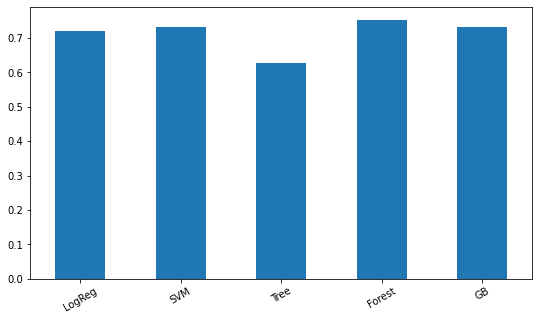

In [ ]:
plt.figure(figsize=(9, 5))
acc_df = pd.DataFrame([acc_logreg_test, acc_svm_test, acc_tree_test, acc_forest_test, acc_GB_test],
                      columns = ['accuracy'],
                      index = ['LogReg', 'SVM', 'Tree', 'Forest', 'GB'])
acc_df['accuracy'].plot(kind='bar', rot=30)
plt.show()

Then, we consider as relevant features the ones got by taking the union of the feature sets obtained by the 
supervised models implemented above.

In [ ]:
# find the union among all the best features sets
# found through the different supervised learning models we trained
features = (set(logreg_features)
                      | set(svm_features)
                      | set(tree_features)
                      | set(forest_features)
                      | set(GB_features))
features = list(features)

features_selected = [predictors[i] for i in features]
print('Final set of features from Supervised Algorithms:\n\n', features_selected)

Final set of features from Supervised Algorithms:

 ['Mach7 ', 'Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho5 H', 'Psycho8 ', 'Psycho9 ']


Let's check how this set of features behaves implementing a standard Logistic Regression.

In [ ]:
# redefine Training and Test set using only the set of features extracted by the previous phase 
Train_val_set = X_train_val_scaled[:, features] 
Test_set = X_test_scaled[:, features]

# before moving forward we need to redefine also y_train and y_test
# Indeed, both y_train and y_test are made of H's and D's, but to apply
# some of the Greedy Feature Selection strategies we are going to define 
# we need H's and D's to be 1's and 0's

y_training_validation = np.zeros(y_train_val.shape)
y_training_validation[y_train_val=='H']=1

y_testing = np.zeros(y_test.shape)
y_testing[y_test=='H']=1

In [ ]:
# implement a classic Logistic Regression to check how the set of extracted features behaves
final_logreg_clf = LogisticRegression()
final_logreg_clf = final_logreg_clf.fit(Train_val_set, y_training_validation)

# save accuracy on train_val test
y_train_val_pred = final_logreg_clf.predict(Train_val_set)
accuracy = np.mean(y_training_validation==y_train_val_pred)
print(accuracy)

# accuracy on test test
y_test_pred = final_logreg_clf.predict(Test_set)
test_accuracy = np.mean(y_testing==y_test_pred)
print(test_accuracy)

0.7506493506493507
0.7010309278350515


In [ ]:
file.write('\n\nFinal set of features from Supervised Algorithms: ')
file.write(str(features_selected))
file.write('\nLogistic Regression Accuracy on Train: ')
file.write(str(accuracy))
file.write('\nLogistic Regression Accuracy on Test: ')
file.write(str(test_accuracy))

file.write('\n\n\n')
file.write('_'*50)
file.write('\n\n\nGreedy Feature Selection')

27

To conclude, in the remaining part of the notebook we will implement and apply some Greedy Backward and Forward Feature Selection strategies, in order to further reduce the set of relevant features.

#### Greedy Backward Selection using Logistic Regression and AIC

In [ ]:
# define a custom function to implement stepwise backward feature selection using Information Criterion (default is AIC)

def SBFS_IC(X_train_val_scaled, y_training_validation, max_accuracy_reduction=0.1, num_features_to_keep=1, Ic='AIC'):

  # fit a Logistic Regression Model on the entire dataset
  final_logreg_clf = LogisticRegression()
  final_logreg_clf = final_logreg_clf.fit(X_train_val_scaled, y_training_validation)

  # save accuracy
  y_train_val_pred = final_logreg_clf.predict(X_train_val_scaled)
  accuracy = np.mean(y_training_validation==y_train_val_pred)

  acc_reduced_model = accuracy
  features_to_keep = np.arange(X_train_val_scaled.shape[1])

  while accuracy-acc_reduced_model<max_accuracy_reduction and len(features_to_keep)>num_features_to_keep:
    IC = {}
    acc = {}
    for i in features_to_keep:
      variables = [j for j in features_to_keep if j!=i]
      Train_val_set = X_train_val_scaled[:, variables]       
      final_logreg_clf = LogisticRegression()
      final_logreg_clf = final_logreg_clf.fit(Train_val_set, y_training_validation)
      y_pred_probs = final_logreg_clf.predict_proba(Train_val_set)

      # save accuracy
      y_train_val_pred = final_logreg_clf.predict(Train_val_set)
      acc[tuple(variables)] = np.mean(y_training_validation==y_train_val_pred)      

      if accuracy-acc[tuple(variables)]<max_accuracy_reduction:                

        # compute log-likelyhood
        log_likelihood = np.sum(y_training_validation*np.log(y_pred_probs[:, 1])+(1-y_training_validation)*np.log(1-y_pred_probs[:, 0]))

        # compute Information Criterion
        if Ic == 'AIC': # compute Akaike IC
          inf_criterion = 2*(len(variables)+2)-2*log_likelihood          
      
        elif Ic == 'BIC': # compute Bayes IC
          inf_criterion = len(variables)*np.log(Train_val_set.shape[0])-2*log_likelihood
        
        IC[tuple(variables)] = inf_criterion

    if len(IC)!=0:       
      features_to_keep = min(IC, key=IC.get)      
      acc_reduced_model = acc[features_to_keep]
    else:      
      return (features_to_keep, acc_reduced_model)
  return (features_to_keep, acc_reduced_model)

In [ ]:
num_features_to_keep = int(20/100*X_train_val.shape[1])
features_to_keep, acc = SBFS_IC(X_train_val_scaled[:, features], y_training_validation, 0.05, num_features_to_keep=num_features_to_keep)
final_features_AIC = [features[index] for index in features_to_keep]

features_selected = [predictors[i] for i in final_features_AIC]

print(features_selected, acc)

['Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho8 ', 'Psycho9 '] 0.7324675324675325


Check how this set of features behaves implementing a standard Logistic Regression

In [ ]:
final_logreg_clf = LogisticRegression()
final_logreg_clf = final_logreg_clf.fit(X_train_val_scaled[:, final_features_AIC], y_training_validation)

# save accuracy
y_train_val_pred = final_logreg_clf.predict(X_train_val_scaled[:, final_features_AIC])
train_accuracy_IC = np.mean(y_training_validation==y_train_val_pred)
print('Train_val accuracy:\t',train_accuracy_IC)

# accuracy on test test
y_test_pred = final_logreg_clf.predict(X_test_scaled[:, final_features_AIC])
test_accuracy_IC = np.mean(y_testing==y_test_pred)
print('Test set accuracy:\t',test_accuracy_IC)

Train_val accuracy:	 0.7324675324675325
Test set accuracy:	 0.711340206185567


In [ ]:
file.write('\n\nFinal set of features using Logistic Regression and AIC: ')
file.write(str(features_selected))
file.write('\nAccuracy on Train: ')
file.write(str(train_accuracy_IC))
file.write('\nAccuracy on Test: ')
file.write(str(test_accuracy_IC))

17

#### Greedy Backward Selection using Logistic Regression and p-values

In [ ]:
from scipy.stats import norm

def SBFS_pvalues(X_train_val_scaled, y_training_validation, max_accuracy_reduction=0.1, num_features_to_keep=1, alpha=0.05):

  # fit a Logistic Regression Model on the entire dataset
  final_logreg_clf = LogisticRegression()
  final_logreg_clf = final_logreg_clf.fit(X_train_val_scaled, y_training_validation)

  # save accuracy
  y_train_val_pred = final_logreg_clf.predict(X_train_val_scaled)
  accuracy = np.mean(y_training_validation==y_train_val_pred)

  acc_reduced_model = accuracy
  features_to_keep = list(range(X_train_val_scaled.shape[1]))

  while accuracy-acc_reduced_model<max_accuracy_reduction and len(features_to_keep)>num_features_to_keep:
    p_values = {}    
    
    Train_val_set = X_train_val_scaled[:, features_to_keep]
    final_logreg_clf = LogisticRegression()
    final_logreg_clf = final_logreg_clf.fit(Train_val_set, y_training_validation)
    y_pred_probs = final_logreg_clf.predict_proba(Train_val_set)

    # save accuracy
    y_train_val_pred = final_logreg_clf.predict(Train_val_set)
    acc_reduced_model = np.mean(y_training_validation==y_train_val_pred)      

    if accuracy-acc_reduced_model<max_accuracy_reduction: 

      for j in range(Train_val_set.shape[1]):                

        I_j = np.sum((y_pred_probs[:, 1])*(1-y_pred_probs[:, 0])*np.square(Train_val_set[:, j]))           

        test_statistic = (final_logreg_clf.coef_[0][j]-0)*np.sqrt(I_j)
        p_values[j] = 2*(1-norm.cdf(np.abs(test_statistic)))
        
      feature_to_delete = max(p_values, key=p_values.get)
      
      if p_values[feature_to_delete]>=alpha:      
        del features_to_keep[feature_to_delete]
      else:        
        return features_to_keep

  return features_to_keep

In [ ]:
num_features_to_keep = int(20/100*X_train_val.shape[1])
features_to_keep = SBFS_pvalues(X_train_val_scaled[:, features], y_training_validation, 0.20, num_features_to_keep=num_features_to_keep)
final_features_pvalues = [features[index] for index in features_to_keep]

features_selected = [predictors[i] for i in final_features_pvalues]
print(features_selected)

['Mach7 ', 'Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho5 H', 'Psycho8 ', 'Psycho9 ']


In [ ]:
final_logreg_clf = LogisticRegression()
final_logreg_clf = final_logreg_clf.fit(X_train_val_scaled[:, final_features_pvalues], y_training_validation)

# save accuracy
y_train_val_pred = final_logreg_clf.predict(X_train_val_scaled[:, final_features_pvalues])
train_accuracy_pvalue = np.mean(y_training_validation==y_train_val_pred)
print('Train_val accuracy:\t', train_accuracy_pvalue)

# accuracy on test test
y_test_pred = final_logreg_clf.predict(X_test_scaled[:, final_features_pvalues])
test_accuracy_pvalue = np.mean(y_testing==y_test_pred)
print('Test set accuracy:\t', test_accuracy_pvalue)

Train_val accuracy:	 0.7506493506493507
Test set accuracy:	 0.7010309278350515


In [ ]:
file.write('\n\nFinal set of features using Logistic Regression and p-values: ')
file.write(str(features_selected))
file.write('\nAccuracy on Train: ')
file.write(str(train_accuracy_pvalue))
file.write('\nAccuracy on Test: ')
file.write(str(test_accuracy_pvalue))

18

#### Greedy Forward Selection using Logistic Regression and accuracy

In [ ]:
final_logreg_clf = LogisticRegression()

# apply Forward selection
sfs = SequentialFeatureSelector(final_logreg_clf, direction='forward', n_features_to_select=int(20/100*X_train_val.shape[1]))
sfs.fit(X_train_val_scaled[:, features], y_train_val)
final_features_forward = [features[i] for i in range(len(features)) if sfs.get_support()[i]>0]

features_selected = [predictors[i] for i in final_features_forward]
print('Final features after greedy forward selection: ', features_selected)

# fit the model once again
logreg_clf = final_logreg_clf.fit(X_train_val_scaled[:, final_features_forward], y_train_val)
y_train_val_pred = final_logreg_clf.predict(X_train_val_scaled[:, final_features_forward])
y_test_pred = final_logreg_clf.predict(X_test_scaled[:, final_features_forward])

train_accuracy_forward = np.mean(y_train_val==y_train_val_pred)
test_accuracy_forward = np.mean(y_test==y_test_pred)

print('Accuracy on train:', train_accuracy_forward)
print('Accuracy on test:', test_accuracy_forward)

Final features after greedy forward selection:  ['Mach9 ', 'Psycho1 ', 'Psycho5 H', 'Psycho8 ', 'Psycho9 ']
Accuracy on train: 0.7480519480519481
Accuracy on test: 0.6804123711340206


In [ ]:
file.write('\n\nFinal set of features using Greedy Forward Selection with Logistic Regression: ')
file.write(str(features_selected))
file.write('\nAccuracy on Train: ')
file.write(str(train_accuracy_forward))
file.write('\nAccuracy on Test: ')
file.write(str(test_accuracy_forward))

18

#### Greedy Backward Selection using Logistic Regression and accuracy

In [ ]:
# apply Backward selection
sfs = SequentialFeatureSelector(final_logreg_clf, direction='backward', n_features_to_select=int(20/100*X_train_val.shape[1]))
sfs.fit(X_train_val_scaled[:, features], y_train_val)
final_features_backward = [features[i] for i in range(len(features)) if sfs.get_support()[i]>0]

features_selected = [predictors[i] for i in final_features_backward]
print('Final features after greedy backward selection: ', features_selected)

# fit the model once again
logreg_clf = logreg_clf.fit(X_train_val_scaled[:, final_features_backward], y_train_val)
y_train_val_pred = logreg_clf.predict(X_train_val_scaled[:, final_features_backward])
y_test_pred = logreg_clf.predict(X_test_scaled[:, final_features_backward])

train_accuracy_backward = np.mean(y_train_val==y_train_val_pred)
test_accuracy_backward = np.mean(y_test==y_test_pred)

print('Accuracy on train:', train_accuracy_backward)
print('Accuracy on test:', test_accuracy_backward)

Final features after greedy backward selection:  ['Mach9 ', 'Psycho1 ', 'Psycho2 ', 'Psycho5 H', 'Psycho8 ']
Accuracy on train: 0.7714285714285715
Accuracy on test: 0.7216494845360825


In [ ]:
file.write('\n\nFinal set of features using Greedy Backward Selection with Logistic Regression: ')
file.write(str(features_selected))
file.write('\nAccuracy on Train: ')
file.write(str(train_accuracy_backward))
file.write('\nAccuracy on Test: ')
file.write(str(test_accuracy_backward))
file.close()

Finally, we compare the different Greedy Feature Selections we applied, by considering both the achieved test accuracies and the number of features selected by each model:

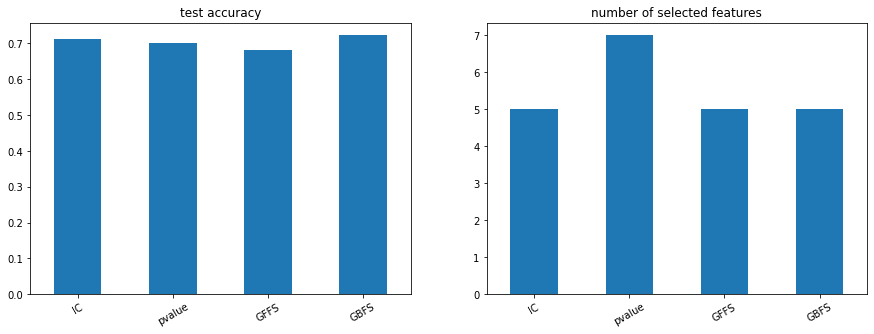

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

acc_df = pd.DataFrame([test_accuracy_IC, test_accuracy_pvalue, test_accuracy_forward, test_accuracy_backward],
                      columns = ['test_accuracy'],
                      index = ['IC', 'pvalue', 'GFFS', 'GBFS'])
acc_df['test_accuracy'].plot(kind='bar', rot=30, ax=axes[0], title ='test accuracy')


feats_df = pd.DataFrame([len(final_features_AIC), len(final_features_pvalues), len(final_features_forward), len(final_features_backward)],
                      columns = ['num selected features'],
                      index = ['IC', 'pvalue', 'GFFS', 'GBFS'])

feats_df['num selected features'].plot(kind='bar', rot=30, ax=axes[1], title ='number of selected features')

plt.show()

### Venn Diagram

As a last step, let's check whether there are some features that tend to be selected as relevant across the different feature selection strategies.
To check this we plot a Venn Diagram.

<Figure size 504x504 with 0 Axes>

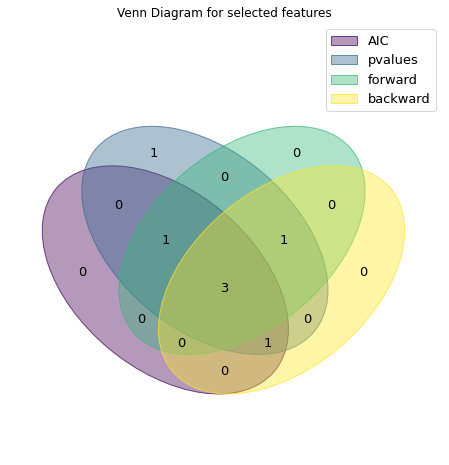

In [ ]:
venn_dict = {'AIC': set(final_features_AIC),
             'pvalues': set(final_features_pvalues),
             'forward': set(final_features_forward),
             'backward': set(final_features_backward)}

plt.figure(figsize=(7, 7))
venn(venn_dict)
plt.title('Venn Diagram for selected features')
plt.show()

## 5. Conclusions 

With this project we focused on machine learning tasks related to psychological tests.  Specifically, each of the datasets provided relates to a binary classification problem in which we are asked to distinguish between honest and dishonest responses. 

Our goal was to identify the most relevant features for prediction purposes, i.e., the features most useful for detecting malingering behaviors.
 
We implemented both unsupervised and supervised feature selection strategies.

Unsupervised feature extractions are based on PCA, sparse PCA and Variance Thresholding, while supervised feature extraction strategies are based on Logistic Regression, Support Vector Machine, Decision Tree, Random Forest and Gradient Boosting.

Ad hoc feature selections were implemented for each model.

The results obtained on each of the datasets are reported in the txt files created and updated while running the notebook.

From what we could see, in general, our feature selection strategies seem to behave quite well, managing in some cases to determine a group of predictors that constitutes about 95% of the accuracy on the Test set.

Other datasets on the other hand proved to be a bit more problematic, nonetheless our feature extraction strategy still manages to determine small sets of predictors that contribute up to 75% - 80% of the accuracy on Test set.

Without any doubt the ideas we implemented can be improved, perhaps considering some ensemble models and also different Component Analysing strategies.

It would also be interesting to focus more on each one of the dataset and implement some feature extraction strategies specific to faking good and faking bad separately.

To conclude, this notebook represents just a starting point and there's a lot of space for improvement and new ideas.